In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import random
import numpy
import copy
import math
from itertools import permutations 

In [ ]:
#[0,0] is top-left corner
def print_board(tiles):
    print(" ---------------")
    for i in range(4):
        print("| ",end="")
        for j in range(4):
            if tiles[i][j]==0:
                print(" "+" | ",end="")
            else:
                print(str(tiles[i][j])+" | ",end="")
        print("")
        print(" ---------------")

def new_tile(tiles):
    available_cells=[]
    for i in range(4):
        for j in range(4):
            if tiles[i][j]==0:
                available_cells.append([i,j])
    pos=random.randint(0,len(available_cells)-1)
    val=numpy.random.choice([2,4],p=[0.9,0.1])
    # print(pos)
    return available_cells[pos],val

def check_game_over(tiles):
    for i in range(4):
        for j in range(4):
            if tiles[i][j]==0:
                return False
    for i in range(4):
        for j in range(3):
            if tiles[i][j]==tiles[i][j+1]:
                return False
    for j in range(4):
        for i in range(3):
            if tiles[i][j]==tiles[i+1][j]:
                return False
    return True

def take_action(tiles,action):
    temp=copy.deepcopy(tiles)
    update=0
    if action==1:
        for col in range(4):
            for row in range(1,4):
                if tiles[row][col]!=0:
                    i=row-1
                    f=0
                    while(i>=0 and tiles[i][col]==0):
                        f=1
                        i-=1
                    if f==1:
                        tiles[i+1][col]=tiles[row][col]
                        tiles[row][col]=0
                    # for i in range(row,4):
                    #     tiles[i][col]=tiles[i+1][col]
                    # tiles[3][col]=0
            for row in range(3):
                if tiles[row][col]==tiles[row+1][col]:
                    tiles[row][col]+=tiles[row][col]
                    update+=tiles[row][col]
                    for i in range(row+1,3):
                        tiles[i][col]=tiles[i+1][col]
                    tiles[3][col]=0
    elif action==2:
        for col in range(4):
            for row in range(2,-1,-1):
                if tiles[row][col]!=0:
                    i=row+1
                    f=0
                    while(i<4 and tiles[i][col]==0):
                        i+=1
                        f=1
                    if f==1:
                        tiles[i-1][col]=tiles[row][col]
                        tiles[row][col]=0
                    
                # if tiles[row][col]==0:
                #     for i in range(row-1,-1,-1):
                #         tiles[i+1][col]=tiles[i][col]
                #     tiles[0][col]=0
            for row in range(3,0,-1):
                if tiles[row][col]==tiles[row-1][col]:
                    tiles[row][col]+=tiles[row][col]
                    update+=tiles[row][col]
                    for i in range(row-1,0,-1):
                        tiles[i][col]=tiles[i-1][col]
                    tiles[0][col]=0
    elif action==3:
        for row in range(4):
            for col in range(1,4):
                if tiles[row][col]!=0:
                    f=0
                    i=col-1
                    while(i>=0 and tiles[row][i]==0):
                        i-=1
                        f=1
                    if f==1:
                        tiles[row][i+1]=tiles[row][col]
                        tiles[row][col]=0
                    # for i in range(col,3):
                    #     tiles[row][i]=tiles[row][i+1]
                    # tiles[row][3]=0 
            for col in range(3):
                if tiles[row][col]==tiles[row][col+1]:
                    tiles[row][col]+=tiles[row][col]
                    update+=tiles[row][col]
                    for i in range(col+1,3):
                        tiles[row][i]=tiles[row][i+1]
                    tiles[row][3]=0
    elif action==4:
        for row in range(4):
            for col in range(2,-1,-1):
                if tiles[row][col]!=0:
                    f=0
                    i=col+1
                    while(i<4 and tiles[row][i]==0):
                        f=1
                        i+=1
                    if f==1:
                        tiles[row][i-1]=tiles[row][col]
                        tiles[row][col]=0
                    # for i in range(col,0,-1):
                    #     tiles[row][i]=tiles[row][i-1]
                    # tiles[row][0]=0
            for col in range(3,0,-1):
                if tiles[row][col]==tiles[row][col-1]:
                    tiles[row][col]+=tiles[row][col]
                    update+=tiles[row][col]
                    for i in range(col-1,0,-1):
                        tiles[row][i]=tiles[row][i-1]
                    tiles[row][0]=0
    game_over=check_game_over(tiles)
    if game_over:
        return tiles,update,game_over
    not_changed=check_same(tiles,temp)
    # print(not_changed)
    while not_changed:
        print("this action caused no change!")
        print("Choose Action : 1.Up 2.Down 3.Left 4.Right")
        action=int(input())
        tiles,update,game_over=take_action(tiles,action)
        not_changed=check_same(tiles,temp)
        # print(not_changed)
    return tiles,update,game_over

def check_same(x,y):
    for i in range(4):
        for j in range(4):
            if x[i][j]!=y[i][j]:
                return False
    return True


In [ ]:
def custom_log(value):
  if value==0:
    return str(hex(int(0)))
  else:
    return str(hex(int(math.log(value,2))))

In [ ]:
ind={}
count=0
for i in range(16):
  for j in range(16):
    for k in range(16):
      for l in range(16):
            st=str(hex(i))+str(hex(j))+str(hex(k))+str(hex(l))
            ind[st]=count
            count+=1

In [ ]:
def line(grid):
  ax=[]
  grid_rot=grid
  for i in range(3):
    txt=""
    txt+=custom_log(grid_rot[0][i])
    txt+=custom_log(grid_rot[1][i])
    txt+=custom_log(grid_rot[2][i])
    txt+=custom_log(grid_rot[3][i])
    ax.append(txt)
  for j in range(1,3):
    grid_rot=np.rot90(grid,k=j)
    for i in range(3):
      txt=""
      txt+=custom_log(grid_rot[0][i])
      txt+=custom_log(grid_rot[1][i])
      txt+=custom_log(grid_rot[2][i])
      txt+=custom_log(grid_rot[3][i])
      ax.append(txt)
  pos=np.array([np.array([0]*1) for i in range(len(ind.keys()))])
  # print(pos.size)
  for i in ax:
    pos[ind[i]][0]=1
  return pos

In [ ]:
def count_pair_of_mergable_tiles(tiles):
    x=0
    for i in range(4):
        for j in range(3):
            if tiles[i][j]==tiles[i][j+1]:
                x+=1
    for j in range(4):
        for i in range(3):
            if tiles[i][j]==tiles[i+1][j]:
                x+=1
    return x

In [ ]:
def count_empty_tiles(tiles):
    x=0
    for i in range(4):
        for j in range(4):
            if tiles[i][j]==0:
                x+=1
    return x

In [ ]:
def count_distinct_tiles(tiles):
    tileset={}
    for i in range(4):
        for j in range(4):
            if tiles[i][j] not in tileset:
                tileset[tiles[i][j]]=1
    return len(tileset.keys())

In [ ]:
# tiles=[[0]*4 for i in range(4)]
# pos,val=new_tile(tiles)
# tiles[pos[0]][pos[1]]=val
# score=0
# game_over=False
# while not game_over:
#     pos,val=new_tile(tiles)
#     tiles[pos[0]][pos[1]]=val
#     print_board(tiles)
#     print("Choose Action : 1.Up 2.Down 3.Left 4.Right")
#     action=int(input())
#     tiles,add_score,game_over=take_action(tiles,action)
#     score+=add_score
#     print_board(tiles)
# print("GAME OVER")

# count_layered([[2,4,8,16],[4,0,0,0],[0,0,0,0],[0,0,0,0]])

In [ ]:
def count_layered(grid): #relies on the fact that an empty tile is NOT represented as 0. 1 would be prefered for empty tile. 
    count = 0
    for col in range(4):
        if((grid[0][col]==2*grid[1][col]) and grid[0][col]!=0):
            count+=1
        if((grid[3][col]==2*grid[2][col]) and grid[3][col]!=0):
            count+=1
        for row in range(1, 3):
            if((grid[row][col]==2*grid[row+1][col] or grid[row][col]==2*grid[row-1][col]) and  grid[row][col]!=0):
                count+=1
                
    # for row in range(4):
    #     if((grid[row][0]==2*grid[row][1]) and grid[row][0]):
    #         count+=1
    #     if((grid[row][3]==2*grid[row][2]) and grid[row][3]):
    #         count+=1
    #     for col in range(1, 3):
    #         if((grid[row][col]==2*grid[row][col+1] or grid[row][col]==2*grid[row][col-1]) and grid[row][col]!=0):
    #             count+=1
    return(count)

In [ ]:
def calculate_v(state,weights):
  phi = feature_vec(state)
  # print(phi.shape)
  # print(phi)
  # print("wt",weights)
  v = phi.dot(weights)
  # print(v)
  return v

In [ ]:
def count_large_tiles(grid):
  count=0
  for i in grid:
    for j in i:
      if j>=1024:
        count+=1
  return count

In [ ]:
def feature_vec(state):
  feat=[count_layered(state),count_distinct_tiles(state),count_empty_tiles(state),count_pair_of_mergable_tiles(state),count_large_tiles(state)]
#   feat.append(np.array([count_layered(state)]))
#   feat.append(np.array([count_distinct_tiles(state)]))
#   feat.append(np.array([count_empty_tiles(state)]))
#   feat.append(np.array([count_pair_of_mergable_tiles(state)]))
#   feat.append(np.array([count_large_tiles(state)]))
#   feat.append(np.array([count_rect(state)]))
#   print(np.array(state.flatten()))
#   print(np.array(feat))
  feat = np.concatenate((np.array(state.flatten()),np.array(feat)))
  # print(np.array(feat))
  # print(np.array(line(state)))
#   feat=np.concatenate((np.array(feat),np.array(line(state))))
  # for i in state:
  #   for j in i:
  #     feat.append(np.array([j]))
  # print(feat.shape)
  return feat.reshape((1,21))

In [ ]:
c = np.array([1,2,3,4,5])
d = np.array([3,4,7,3,9])

print(c.dot(d))

89


In [ ]:
def generate_game():
  tiles=np.array([np.array([0]*4) for i in range(4)])
  pos,val=new_tile(tiles)
  tiles[pos[0]][pos[1]]=val
  pos,val=new_tile(tiles)
  tiles[pos[0]][pos[1]]=val
  # print(tiles)
  return tiles

In [ ]:
def count_rect(grid):
  count = 0
  for row in range(3):
      for col in range(1, 3):
        if(grid[row][col]!=0 and grid[row][col-1]!=0 and grid[row][col+1]!=0 and grid[row+1][col]!=0 and grid[row+1][col-1]!=0 and grid[row+1][col+1]!=0):
          count+=1
  for col in range(3):
      for row in range(1, 3):
        if(grid[row][col]!=0 and grid[row-1][col]!=0 and grid[row+1][col]!=0 and grid[row][col+1]!=0 and grid[row+1][col+1]!=0 and grid[row-1][col+1]!=0):
          count+=1
  return count

In [ ]:
def next_move(tiles,action):
  temp=copy.deepcopy(tiles)
  update=0
  if action==1:
      for col in range(4):
          for row in range(1,4):
              if tiles[row][col]!=0:
                  i=row-1
                  f=0
                  while(i>=0 and tiles[i][col]==0):
                      f=1
                      i-=1
                  if f==1:
                      tiles[i+1][col]=tiles[row][col]
                      tiles[row][col]=0
                  # for i in range(row,4):
                  #     tiles[i][col]=tiles[i+1][col]
                  # tiles[3][col]=0
          for row in range(3):
              if tiles[row][col]==tiles[row+1][col]:
                  tiles[row][col]+=tiles[row][col]
                  update+=tiles[row][col]
                  for i in range(row+1,3):
                      tiles[i][col]=tiles[i+1][col]
                  tiles[3][col]=0
  elif action==2:
      for col in range(4):
          for row in range(2,-1,-1):
              if tiles[row][col]!=0:
                  i=row+1
                  f=0
                  while(i<4 and tiles[i][col]==0):
                      i+=1
                      f=1
                  if f==1:
                      tiles[i-1][col]=tiles[row][col]
                      tiles[row][col]=0
                  
              # if tiles[row][col]==0:
              #     for i in range(row-1,-1,-1):
              #         tiles[i+1][col]=tiles[i][col]
              #     tiles[0][col]=0
          for row in range(3,0,-1):
              if tiles[row][col]==tiles[row-1][col]:
                  tiles[row][col]+=tiles[row][col]
                  update+=tiles[row][col]
                  for i in range(row-1,0,-1):
                      tiles[i][col]=tiles[i-1][col]
                  tiles[0][col]=0
  elif action==3:
      for row in range(4):
          for col in range(1,4):
              if tiles[row][col]!=0:
                  f=0
                  i=col-1
                  while(i>=0 and tiles[row][i]==0):
                      i-=1
                      f=1
                  if f==1:
                      tiles[row][i+1]=tiles[row][col]
                      tiles[row][col]=0
                  # for i in range(col,3):
                  #     tiles[row][i]=tiles[row][i+1]
                  # tiles[row][3]=0 
          for col in range(3):
              if tiles[row][col]==tiles[row][col+1]:
                  tiles[row][col]+=tiles[row][col]
                  update+=tiles[row][col]
                  for i in range(col+1,3):
                      tiles[row][i]=tiles[row][i+1]
                  tiles[row][3]=0
  elif action==4:
      for row in range(4):
          for col in range(2,-1,-1):
              if tiles[row][col]!=0:
                  f=0
                  i=col+1
                  while(i<4 and tiles[row][i]==0):
                      f=1
                      i+=1
                  if f==1:
                      tiles[row][i-1]=tiles[row][col]
                      tiles[row][col]=0
                  # for i in range(col,0,-1):
                  #     tiles[row][i]=tiles[row][i-1]
                  # tiles[row][0]=0
          for col in range(3,0,-1):
              if tiles[row][col]==tiles[row][col-1]:
                  tiles[row][col]+=tiles[row][col]
                  update+=tiles[row][col]
                  for i in range(col-1,0,-1):
                      tiles[row][i]=tiles[row][i-1]
                  tiles[row][0]=0
  game_over=check_game_over(tiles)
  not_changed=check_same(tiles,temp)
  if game_over or not_changed:
      return tiles,0,True
  pos,val=new_tile(tiles)
  tiles[pos[0]][pos[1]]=val
  return tiles, update,False

In [ ]:
def single_stage_td(max_value):
  weights = np.zeros((21,1))
  # weights2 = np.zeros((21,1))
  # weights3 = np.zeros((21,1))
  actions = np.array([1,2,3,4])
  # weights = copy.deepcopy(weights1) 
  dic={1:"u",2:"d",3:"l",4:"r"}
  alpha = 0.00001
  epsilon=1
  # k=10

  cumm_rewards = [0]*10000
  # while true:
  for i in range(10000):
    state = generate_game() 
    timesteps = 1
    # weights = copy.deepcopy(weights1) 
    max_value = 0
    while True:
      # if max_value==math.pow(2,10):
        # weights1 = copy.deepcopy(weights)
        # weights = copy.deepcopy(weights2)
      # if max_value==math.pow(2,13):
        # weights2 = copy.deepcopy(weights)
        # weights = copy.deepcopy(weights3)
        # k+=8
      # print(state)
      epsilon = 1 / timesteps
      # alpha = 1 / timesteps
      timesteps += 1
      state_values = {}
      action_selection = []
      for a in actions:
        temp_state = copy.deepcopy(state)
        next_state,r,checker = next_move(temp_state,a)
        if not checker:
          action_selection.append(calculate_v(next_state,weights))
        else:
          action_selection.append(float('-inf'))

      # print(action_selection)
      if np.max(action_selection) == float('-inf'):
#         print(i,state)
        # print(i) 
        # print(weights) 
        t = np.amax(state)
        if max_value < t:
          max_value = t
        print(i,state)
        print("\n")     
        break
      p=random.random()
      if p<(1-epsilon):
        selected_action = np.argmax(action_selection) + 1  
      else:
        selected_action = random.randint(1,4)
      # print(dic[selected_action])
      next_state, reward, checker = next_move(state,selected_action)
      cumm_rewards[i] += reward
      phi = feature_vec(state)
      if str(state) not in state_values:
        state_values[str(state)] = 0
      state_values[str(state)] = phi.dot(weights)

      weights = weights + alpha * (reward + np.max(action_selection) - state_values[str(state)]) * np.transpose(phi) 
      state = next_state

    
      # 𝑉(𝑠) = 𝜑(𝑠) ∙ theta
  print(max_value)
  return weights, cumm_rewards


In [ ]:
a,b = single_stage_td(0)

0 [[ 16  32 128 512]
 [  8  16  64   4]
 [  4   8  16  32]
 [  2   4   2  16]]


1 [[  2  32 128 512]
 [  8  16   2 128]
 [  4   8  16  64]
 [  2   4   8  16]]


2 [[ 16  32 128 256]
 [  8  16  64 128]
 [  4   8  16  32]
 [  2   4   8   4]]


3 [[  2  16   4   2]
 [  4  64   8   4]
 [128  32  16   8]
 [256 128  32  16]]


4 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  16  64 128]
 [  2  32 128 256]]


5 [[ 16 256 512  32]
 [128  64   8   2]
 [  4  16  32  16]
 [  2   4   8   2]]


6 [[ 16  32 128 256]
 [  8  16   2 128]
 [  4   8  32  16]
 [  2   4   8   2]]


7 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  16  64 128]
 [  2  32 128   2]]


8 [[ 16   8   4   2]
 [  4  32  16   4]
 [256 128  32   8]
 [ 64  16   8   4]]


9 [[512   4  64  32]
 [ 32  64  32   8]
 [  2  32  16   4]
 [  4  16   4   2]]


10 [[256   2  32   4]
 [128  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


11 [[128  64  32  16]
 [ 64   8   2   8]
 [ 16   4   8   4]
 [  4   2   4   2]]


12 [[  2  32 128   2]
 [  

102 [[512 128  32  16]
 [128  32  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


103 [[  8   2   4   2]
 [ 64  32  16   8]
 [128  64  32   4]
 [ 32  16  64   2]]


104 [[256 128  64  16]
 [  4  64  32   8]
 [ 64  32  16   4]
 [  2   8   4   2]]


105 [[  2 128  32  16]
 [128   4  16   8]
 [  2  64   8   4]
 [ 16   8   4   2]]


106 [[256 128  64  16]
 [128  64  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


107 [[  2   8   4   2]
 [ 32  16   8   4]
 [256  64  16   8]
 [  4 256  64  16]]


108 [[ 16  64   2 128]
 [  4  32  64  32]
 [  2  16  32  16]
 [  4   2   4   2]]


109 [[  2  32  64 256]
 [  8  16  32   4]
 [  4   8  16  32]
 [  2   4   8  16]]


110 [[256  64  32   2]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


111 [[  2  32   2 512]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4   8  32]]


112 [[  4  32   4 256]
 [  8  16  64   8]
 [  4   8  32 128]
 [  2   4   8  32]]


113 [[ 32  64 128  16]
 [  8  32  64   2]
 [  4   8  16  64]
 [  2   4   2   8]]


114 

202 [[ 16   8   4   2]
 [ 64  16   8   4]
 [128  32  16   8]
 [  4 128   4   2]]


203 [[ 16  64 128 256]
 [  8  32  64   2]
 [  4   8  32  64]
 [  2   4   8   4]]


204 [[  4   2   8   2]
 [  2   8  16  32]
 [  4  32  64 128]
 [ 16   2 128 256]]


205 [[  4   2   8   2]
 [  2   8  32  16]
 [  4  16  64 128]
 [ 16  64 128   2]]


206 [[512 128  64  16]
 [128  64  32   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


207 [[ 16   8   4   2]
 [ 64  32  16   4]
 [128  64  32  16]
 [  2 256   4   2]]


208 [[  2   8   4   2]
 [  8  32  16   8]
 [ 32  64  32   2]
 [ 64 128  64  32]]


209 [[256  64   2  16]
 [128  16  32   8]
 [  8  32  16   4]
 [  4   2   8   2]]


210 [[ 2  4  8 16]
 [ 4  8 16 32]
 [ 8 16 32 64]
 [ 2 32 64  4]]


211 [[  2  16   4   2]
 [ 64   2   8   4]
 [  2  64  32  16]
 [256 128  64   2]]


212 [[16  8  4  2]
 [32 16  8  4]
 [64 32 16  8]
 [ 2 64 32 16]]


213 [[  2   8   4   2]
 [ 64  32   8   4]
 [128  64  16   8]
 [256 128  32   2]]


214 [[  2   4   2  16]
 [  4  32   8

302 [[  4  64 128 512]
 [  8  16  64   4]
 [  4   8  32   2]
 [  2   4   8  16]]


303 [[ 16  64 128 256]
 [  8  32  64 128]
 [  4  16   8  64]
 [  2   4   2   8]]


304 [[ 16  64 128   4]
 [  8  16  32 128]
 [  4   8  16   4]
 [  2   4   8   2]]


305 [[ 16  32 256   4]
 [  8  16  64   2]
 [  4   8  16 128]
 [  2   4   8   4]]


306 [[  2  32   2   4]
 [ 64  16   4   2]
 [  2  32  64  16]
 [  4 256   4   2]]


307 [[ 16   8   4   2]
 [ 64  16   8   4]
 [  2 128  32   8]
 [256   2  64   2]]


308 [[  4   2   8   4]
 [  2   4  16  32]
 [  4  32  64 128]
 [ 32   2 128  16]]


309 [[ 16 128   4   2]
 [128  64  32   4]
 [ 64  32  16   2]
 [ 16   8   2   4]]


310 [[ 16  32   4 512]
 [  8  16  64 256]
 [  4   8  16  64]
 [  2   4   8  16]]


311 [[  2  64  32   2]
 [128  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


312 [[  2   4   8   2]
 [  4  16  32   8]
 [  8  32   2  32]
 [ 16   2  64 256]]


313 [[ 16   8   4   2]
 [  2  32   8   4]
 [128  64  16   8]
 [256   2  64  16]]


314 

403 [[  2   8  16 256]
 [  8  16  32 128]
 [  4   2  16  64]
 [  2   8   2  16]]


404 [[  4   2  16   2]
 [  2   8  32   4]
 [  4  16   2  64]
 [  8  32  64 128]]


405 [[ 16  32 128 256]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4   8  16]]


406 [[  8   2   4   2]
 [ 32  16   8   4]
 [128  64  32   8]
 [256 128   4  16]]


407 [[  2   4   8   4]
 [  4   8  16  64]
 [  8  16  64 128]
 [ 16  32 128 256]]


408 [[  2  64 128 512]
 [ 16  32  64 128]
 [  4   8  32  64]
 [  2   4   8   4]]


409 [[  2   4  64 256]
 [ 16  32   8 128]
 [  4   8  16   8]
 [  2   4   8   2]]


410 [[  2   4  16  64]
 [  4  16 256   8]
 [  2   8  16  64]
 [  8  16  64   4]]


411 [[ 16   2 128 256]
 [  2  16  64 128]
 [  4   8  16   4]
 [  2   4   8   2]]


412 [[ 16  64   4 256]
 [  8  16  64 128]
 [  4   8  32   4]
 [  2   4   8   2]]


413 [[  4   2   4   2]
 [  2   4   8  16]
 [  8  16  64   8]
 [ 16  32 128  64]]


414 [[ 32  16   4   2]
 [128  32  16   4]
 [256 128  32   8]
 [ 64  32   4   2]]


415 

503 [[  4  64   4 512]
 [  2  32  64 128]
 [  8  16  32  64]
 [  2   4  16  32]]


504 [[256 128  64   4]
 [128  64  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


505 [[  4  64 128   8]
 [ 16  32  64 128]
 [  4   8  32  64]
 [  2   4   8  16]]


506 [[  2   8   4   2]
 [ 32  16   8   4]
 [128  64  16   2]
 [  4 256  32   4]]


507 [[  2   4   8   2]
 [  4   8  32  64]
 [  8  32  64 128]
 [ 32  64 128 256]]


508 [[  4   2   8   2]
 [  2  16  32   4]
 [ 16  32 128   8]
 [ 64 128   8 128]]


509 [[ 16  64 128 256]
 [  8  32  64 128]
 [  2   4  32  64]
 [  4   2   4   2]]


510 [[256 128  16   2]
 [  4  64  32   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


511 [[  4   2   4   2]
 [  2   4  64 128]
 [  4  32 128 256]
 [  2   8  16 128]]


512 [[ 16   8   4   2]
 [  2  32   8   4]
 [  4  64  32   8]
 [256 128  16   4]]


513 [[256  64  16   8]
 [128  16   8   2]
 [ 16  32   2   4]
 [  2   4  16   2]]


514 [[  2   4   8  16]
 [  4   8  16   4]
 [ 16  32   4  64]
 [  4 128  32   2]]


515 

604 [[ 16   8   4   2]
 [ 32  16   8   4]
 [ 64  32  16   8]
 [128  64  32  16]]


605 [[  2   4   8   2]
 [  4  16  32  64]
 [  8  32  64   2]
 [ 32  64 128 512]]


606 [[256  64  32   2]
 [128  32  16   4]
 [ 64  16   4   8]
 [ 16   2   8   2]]


607 [[512  64  32   2]
 [256   2  16   8]
 [  2  32   8   4]
 [ 16   8   4   2]]


608 [[  2   4   8   2]
 [  4   8  16  32]
 [  2  16  32  64]
 [ 16  32  64 128]]


609 [[  2   4   8   2]
 [  4   8  16  64]
 [  8  16  64 128]
 [ 16  32 128 256]]


610 [[ 32  64 128 256]
 [  4  32  64 128]
 [  2  16  32   8]
 [  4   8   4   2]]


611 [[ 16  64 128 512]
 [  8  32  64   8]
 [  4   8   4  16]
 [  2   4   8   4]]


612 [[  8 128  32  16]
 [256  64  16   8]
 [ 64  32   8   4]
 [  2   8   4   2]]


613 [[256 128  32  16]
 [128  64  16   8]
 [ 64  16   8   4]
 [  2   8   4   2]]


614 [[256 128  32   2]
 [  4  64  16   8]
 [ 64   2   8   4]
 [ 16   8   4   2]]


615 [[  2   4 128   2]
 [  4  32   4 128]
 [  2  16  32   8]
 [  4   2   8   4]]


616 

704 [[  2   4   8  16]
 [  4  16  32  64]
 [  8  32 128   8]
 [  2  16 256 512]]


705 [[ 32  64 128  64]
 [ 16  32  64  16]
 [  2  16  32   4]
 [  4   8   4   2]]


706 [[256 128  64  16]
 [128   4  32   8]
 [ 16  32   8   4]
 [  2   8   4   2]]


707 [[  4   2   4   2]
 [ 32  16   8   4]
 [128  32  16   8]
 [  8 128  32  16]]


708 [[512 256 128  32]
 [256 128  32  16]
 [ 16  32  16   8]
 [  2   4   8   2]]


709 [[256  64  32  16]
 [  2  32  16   8]
 [ 64  16   2   4]
 [  4   2   4   2]]


710 [[256 128  64   8]
 [128  64   8   4]
 [ 64  32   4   2]
 [  2  16   8   4]]


711 [[ 16   8   4   2]
 [ 64  32   8   4]
 [128   2  32  16]
 [512  16  64   4]]


712 [[  2 256  64  16]
 [128  64  32   8]
 [ 64  32  16   4]
 [  2   8   4   2]]


713 [[128   8  64  16]
 [  4  64  32   8]
 [ 64  32   8   4]
 [  4   2   4   2]]


714 [[512 128  64  16]
 [128  64  16   8]
 [ 16  32   8   4]
 [  2   4  16   2]]


715 [[  2   4   8  32]
 [  4   8  32  64]
 [  8  16  64 128]
 [  2  32  16 256]]


716 

803 [[  2   4   8  16]
 [  4  16  32  64]
 [  8  32  64  32]
 [ 16  64 128 256]]


804 [[  8  32  64 128]
 [  4  16  32  64]
 [  2   4  16  32]
 [  8   2   4   2]]


805 [[256 128  64   2]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


806 [[  2  16   4   2]
 [ 64  32  16   4]
 [128  64  32   8]
 [512   2  64  16]]


807 [[256  64  32   4]
 [128   4  16   8]
 [ 32   8   4   2]
 [  8   4   2   4]]


808 [[  4   2   4   2]
 [ 64   8   2   4]
 [128  32  16   8]
 [  2  64   2  16]]


809 [[ 32  64 128  64]
 [ 16  32  64  16]
 [  8  16  32   8]
 [  2   8   4   2]]


810 [[128  64  32   2]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


811 [[  2  64 128 256]
 [  8  16  32 128]
 [  4   8  16   2]
 [  2   4   8  16]]


812 [[ 16  64 256   8]
 [  8  32 128   2]
 [  4   8  32  16]
 [  2   4   8   2]]


813 [[64  2 64 32]
 [ 8 64 32 16]
 [ 4 32 16  4]
 [ 2 16  4  2]]


814 [[256 128  64   2]
 [128   4  32   8]
 [  2  32   8   4]
 [ 32   8   4   2]]


815 [[ 16  64 128 25

903 [[256  64  32  16]
 [ 64  32  16   8]
 [  2  16   8   4]
 [ 16   8   4   2]]


904 [[  2  32  64 512]
 [  4  16  32  64]
 [  2   4  16  32]
 [  4   2   4  16]]


905 [[128   4  32   2]
 [  2  64  16   8]
 [ 64  16   8   4]
 [  2  32   4   2]]


906 [[  2   4   8   2]
 [  4   8  16  64]
 [  8  16  32 128]
 [ 16  32  64   2]]


907 [[  2   4   8   2]
 [  4   8  16  32]
 [  8  16  32  64]
 [  4  64 128 256]]


908 [[  2   4   8  16]
 [  4   8  16  64]
 [  8  16  32   4]
 [  4  32   8 512]]


909 [[  4   8  64  32]
 [  8  16 128   4]
 [  4   8  16  64]
 [  2   4   8   4]]


910 [[  2 128  64  16]
 [ 16  64   2   4]
 [  4  16  32  64]
 [  2   4   8   4]]


911 [[  4 128  64   4]
 [256  64  32   8]
 [ 64  32  16   4]
 [ 32   8   4   2]]


912 [[ 64  16   2  16]
 [256 128  16   8]
 [ 32  16  32   2]
 [  4   2   8   4]]


913 [[  8  64 128 256]
 [  2   4  16 128]
 [  4   8  32  16]
 [  2   4   8   2]]


914 [[  2 256  64  32]
 [128  64  32  16]
 [ 64  32  16   4]
 [  2  16   8   2]]


915 

1002 [[256 128  32   2]
 [128  32  16   8]
 [  2  16   8   4]
 [ 16   8   4   2]]


1003 [[  2   4  16   2]
 [  8  16  32   4]
 [ 16  32  64  32]
 [  2   4 128 512]]


1004 [[512   2  64   4]
 [128  64  32   2]
 [ 32  16   8   4]
 [ 16   8   4   2]]


1005 [[  2   8   4   2]
 [ 32  16   8   4]
 [ 64  32  16   8]
 [256   4  32  16]]


1006 [[512 128  64  16]
 [128  64  32   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


1007 [[  2   8   2   4]
 [ 16  32   8   2]
 [ 64 128  64   8]
 [128   4   2  32]]


1008 [[512 128  16   8]
 [128  16   8   4]
 [ 16  32   4   2]
 [  2   8   2   4]]


1009 [[256  64  32  16]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


1010 [[ 16  64   2 256]
 [  8  16  64 128]
 [  4   8  16  32]
 [  2   4   8   2]]


1011 [[ 16   8   4   2]
 [ 32  16   8   4]
 [128  64  16   2]
 [256 128  32   4]]


1012 [[  2  64 128 256]
 [ 64  16   2   8]
 [  4   8  16  64]
 [  2   4   8   2]]


1013 [[ 16 128 256 512]
 [  8  32  64 128]
 [  4   8  32  64]
 [  2   4  16 

1101 [[256  64  32  16]
 [128  32  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


1102 [[ 16 256  64   2]
 [256  64  32   8]
 [  4 128   8   4]
 [ 32   8   4   2]]


1103 [[  8   4   2   8]
 [ 32  64  16   4]
 [  4  16   8  16]
 [  2 128  64   2]]


1104 [[ 2 32 64  2]
 [ 8 16 32 64]
 [ 4  8 16 32]
 [ 2  4  8 16]]


1105 [[256 128   4   2]
 [128  32  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


1106 [[  4   2   4 256]
 [  2  16  64 128]
 [  4   2   4  16]
 [  2   4   8   2]]


1107 [[  2  64 256   4]
 [  4  32 128   2]
 [ 16   8  16  32]
 [  2   4   8   4]]


1108 [[ 16   8   4   2]
 [ 64  16   8   4]
 [128  64  16   8]
 [256   8  32   2]]


1109 [[ 2  8  2  4]
 [ 4 16  8  2]
 [ 8 32 64  8]
 [ 2 64  2 32]]


1110 [[256 128  64  32]
 [128  64  32   8]
 [ 64  16   8   4]
 [  2   8   4   2]]


1111 [[256 128  64   4]
 [ 32   2  32  16]
 [  4  32  16   4]
 [ 16   8   4   2]]


1112 [[  2 256  64  16]
 [128   2  32   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


1113 [[ 16   2   4   2]


1200 [[  2   4   8  32]
 [  4   8  32  64]
 [  8  16  64 128]
 [  2  64   2 256]]


1201 [[ 16  32  64 128]
 [  8  16  32  64]
 [  4   8  16  32]
 [  2   4   8   2]]


1202 [[  2   4   2   4]
 [128  32   8   2]
 [256 128  16   4]
 [  4 256  32   8]]


1203 [[256 128   8   4]
 [  2  64   2  32]
 [ 64  32  16   4]
 [  4   8   4   2]]


1204 [[  2   4   8   2]
 [  4   8  16  32]
 [  8  16  64 128]
 [ 16  32 128 256]]


1205 [[  2  64 256 512]
 [  8  32 128 256]
 [  4  16  32   2]
 [  2   4   8  16]]


1206 [[  4  64   2  64]
 [  8  32  64   4]
 [  4   8  32 128]
 [  2   4  16  32]]


1207 [[ 32  64 128 512]
 [  8  32  64   8]
 [  4   8  16  64]
 [  2   4   2   4]]


1208 [[512  32   4   2]
 [128  64  32  16]
 [ 64  32   4   2]
 [  4  16   2   4]]


1209 [[  4   8   4   2]
 [  8  16  32  16]
 [ 16  32  64  32]
 [ 32  64 128 512]]


1210 [[128   8  32  16]
 [  4  64  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


1211 [[  2   4   2   4]
 [ 64  32   4   2]
 [128  64  32   4]
 [256 128  64 

1299 [[  2  32  64 128]
 [  8  16  32  64]
 [  2   4  16   2]
 [  4   2   4   8]]


1300 [[256 128  32  16]
 [ 16  32  16   8]
 [  8  16   8   4]
 [  4   8   4   2]]


1301 [[ 16  32   4 256]
 [  8  16  64 128]
 [  4   8  16  32]
 [  2   4   8  16]]


1302 [[256 128  64  16]
 [128  64  16   8]
 [ 64  16   8   4]
 [  4   8   4   2]]


1303 [[  4   2  64 256]
 [  2  32   2  16]
 [  4   8  32   8]
 [  2   4  16   4]]


1304 [[256 128  64   2]
 [128  64  16   8]
 [ 64  32   8   4]
 [ 16   8   4   2]]


1305 [[  2   4   8   2]
 [  4   8  16  32]
 [  8  16  32  64]
 [ 16  32 128 256]]


1306 [[256 128   4  32]
 [ 64  32  64   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


1307 [[ 16   8   4   2]
 [ 32  16   8   4]
 [128  32  16   2]
 [  2 128   8   4]]


1308 [[32 64  2 64]
 [ 8 32 64 16]
 [ 4 16 32  8]
 [ 2  4  8  4]]


1309 [[  2   8   4   2]
 [ 64  16   8   4]
 [128  64  32   8]
 [256   4  64  16]]


1310 [[512   8  32  16]
 [128  32  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


1311 [[2

1398 [[ 2 64  8  4]
 [32 16  4  8]
 [64  2 16  4]
 [16  8  4  2]]


1399 [[256  64   4   2]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


1400 [[ 32 256  64  32]
 [  8  32  16   8]
 [ 32  16   8   2]
 [  2   4   2   4]]


1401 [[  2   4   8   2]
 [ 32   8   2   4]
 [  2  32  16   8]
 [128  64  32  16]]


1402 [[  2  32 128   2]
 [  8  16  32  64]
 [  4   8  16  32]
 [  2   4   8  16]]


1403 [[ 16   2 128 256]
 [  8  16  64 128]
 [  4   8  16  32]
 [  2   4   8   4]]


1404 [[128   4  32  16]
 [  2  64  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


1405 [[ 64   2  64   2]
 [256  64  32   8]
 [ 64  32  16   4]
 [ 32   8   4   2]]


1406 [[128   4  32   4]
 [ 16  64  16   8]
 [  4  16   4   2]
 [  2   8   2   4]]


1407 [[  2  64 128 256]
 [  8  32  64 128]
 [  4   8  32  64]
 [  2   4   8  16]]


1408 [[256 128  32   4]
 [128  64  16   2]
 [ 64   2   8   4]
 [ 16   8   4   2]]


1409 [[  2  32 128 256]
 [  8  16  64 128]
 [  4   8  16  64]
 [  2   4   8  16]]


1410 [[ 

1497 [[512 128  32  16]
 [128  64  16   4]
 [ 32  16   8   2]
 [  2   4   2   4]]


1498 [[128  64  32   2]
 [  4  32  16   8]
 [  2  16   8   4]
 [ 16   8   4   2]]


1499 [[256 128  32  16]
 [128  64  16   2]
 [  4  32   8   4]
 [  2  16   4   2]]


1500 [[  2   4   8   2]
 [  4   8  32  64]
 [  8  32  64 128]
 [  2  64 128 512]]


1501 [[ 16  32  64 256]
 [  8  16  32 128]
 [  4   8  16  64]
 [  2   4   8   2]]


1502 [[512   4   2  16]
 [  2  64  32   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


1503 [[  2   4   8  16]
 [  4   8  32  64]
 [ 16  32  64 128]
 [  4  64 128 256]]


1504 [[  4  64 128 256]
 [ 16  32  64 128]
 [  4   8  16  64]
 [  2   4   8  16]]


1505 [[ 16   8   4   2]
 [  2  32   8   4]
 [128  64  16   8]
 [  2  16  64   2]]


1506 [[  2   4   8  16]
 [  4   8  16   2]
 [  8  16  64 128]
 [  2  32 128 256]]


1507 [[ 16   8   4   2]
 [  2  64   8   4]
 [128   2  32   8]
 [256 128   8   4]]


1508 [[  2   4   8  16]
 [  4   8  16  64]
 [ 16  32  64 128]
 [  4  16 128 

1596 [[ 32  16   4   2]
 [ 64  32   8   4]
 [256  64  16   8]
 [ 64   8   4  16]]


1597 [[256 128  16   4]
 [128  32   4   2]
 [  2  64   8   4]
 [ 16   8   4   2]]


1598 [[16  8  4  2]
 [32 16  8  4]
 [ 2 64 16  8]
 [64  2 32 16]]


1599 [[  4   2   8   4]
 [  2   4  16  32]
 [  4  16  32 128]
 [  8  32  64 512]]


1600 [[  4  32 128 256]
 [  8  16  32 128]
 [  4   8  16  32]
 [  2   4   8   2]]


1601 [[ 16  32 128   4]
 [  8  16   4 128]
 [  4   8  16  64]
 [  2   4   8   4]]


1602 [[  2   8 128  32]
 [128  64  32  16]
 [  8  32  16   8]
 [  4   2   8   4]]


1603 [[ 4  8  4  2]
 [32 16  8  4]
 [64 32 16  8]
 [ 4 64 32 16]]


1604 [[  4   2   8  16]
 [  2   4  32  64]
 [  4  32  64 128]
 [  2  16 128 256]]


1605 [[  4  64 128   4]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4   8  32]]


1606 [[ 16  64 128 512]
 [  8  32  64   2]
 [  2   4  32  64]
 [  4   2   4   2]]


1607 [[256 128  64  16]
 [128  64  32   8]
 [ 64  32   2   4]
 [  4   2   4   2]]


1608 [[  2   4   8   2]


1695 [[ 16  64  32 256]
 [  8  32   2 128]
 [  4   8  16  32]
 [  2   4   8   2]]


1696 [[  2   8  16   2]
 [  4  16  32  64]
 [ 16  32 512   4]
 [ 32  64 128   8]]


1697 [[ 16  32  64 256]
 [  8  16   2   4]
 [  4   8  16  32]
 [  2   4   8   2]]


1698 [[  8   2   8  32]
 [  2   4  16  64]
 [  4  16  64 256]
 [  2  32   2   4]]


1699 [[  2   8   2   8]
 [  4  16   8  64]
 [  8  32  64  32]
 [ 16   2 128 256]]


1700 [[  2  32 128 256]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4   8  32]]


1701 [[  2   4  64 256]
 [  8  16   4 128]
 [  4  32   8  32]
 [  2   4   2  16]]


1702 [[  2   4   8  32]
 [  4   8  16  64]
 [  8  16  64 128]
 [  2  32 128 512]]


1703 [[256 128  32   4]
 [128  64  16   2]
 [ 64  32   8   4]
 [ 32   2   4   2]]


1704 [[128  64  32   2]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


1705 [[ 16  32  64 256]
 [  8  16   2  64]
 [  4   8  16  32]
 [  2   4   8  16]]


1706 [[  2   4   8  16]
 [  4   8  16  64]
 [ 16  32  64   2]
 [  2   8 128 

1795 [[  2   4   2   4]
 [ 64  16   8   2]
 [128  32  16   8]
 [256 128  32  16]]


1796 [[  8   2   4   2]
 [ 16  32  16   8]
 [128  64  32  16]
 [512 128  64   4]]


1797 [[  2   4  32  64]
 [  8  32  64 128]
 [  4   8  32  64]
 [  2   4   8  16]]


1798 [[ 16   8   4   2]
 [  2  16   8   4]
 [128  32  16   8]
 [256 128  32   2]]


1799 [[  2   4   8  16]
 [  4   8  16  32]
 [  2  16  32  64]
 [  4   8  64 256]]


1800 [[  4 128  64  16]
 [ 64   2  32   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


1801 [[ 16  64 128 256]
 [  8  16  64 128]
 [  4   8  16  64]
 [  2   4   8   2]]


1802 [[  2   4   8   4]
 [  4   8  32   8]
 [  8  16   2 128]
 [ 16  64 128 256]]


1803 [[256   8   2   8]
 [ 64  32   8   2]
 [  8  16   2   4]
 [  2   4   8   2]]


1804 [[  2   4   8   2]
 [  4   8  64 128]
 [  8  32 128 256]
 [  2   4   8  64]]


1805 [[  2   4   8  16]
 [  4  16  32  64]
 [  8  64 128   2]
 [ 16   2  16 128]]


1806 [[  2  32   4 128]
 [  8  16 128   2]
 [  4   8  32  64]
 [  2   4   8 

1893 [[256 128  64  32]
 [128  64  32   8]
 [ 64  32  16   2]
 [  4   8   2   4]]


1894 [[  2  16   4   2]
 [ 64  32  16   4]
 [128   2  32   8]
 [256 128   4   2]]


1895 [[  4 128  16   2]
 [256  64  32   8]
 [ 64  32  16   4]
 [ 32   2   4   2]]


1896 [[  2 128  64   2]
 [256  64  16   8]
 [ 32  16   4   2]
 [  2   4   8   4]]


1897 [[ 64   4  64   2]
 [256  64  16   8]
 [ 64  32   8   4]
 [ 32   8   4   2]]


1898 [[512 128  64   2]
 [128   2  32  16]
 [ 64  32   8   4]
 [  4   2  16   2]]


1899 [[ 4  2  4  2]
 [32 16  8  4]
 [ 2  4 32  8]
 [ 8 32 64 16]]


1900 [[  2   4   8   2]
 [  4   8  16  32]
 [  8  16  32  64]
 [ 16 128  64 256]]


1901 [[  2   8   4   2]
 [ 32  16   8   4]
 [128  64  16   8]
 [256 128  32  16]]


1902 [[ 16   8   4   2]
 [ 32  16   8   4]
 [128  32  16   8]
 [512 128  32   2]]


1903 [[256  16   4   2]
 [  4  32  16   8]
 [ 32  16   8   2]
 [ 16   8   2   4]]


1904 [[  2   4   8   2]
 [  4  16  32   4]
 [  8  32  64  32]
 [ 16  64   4 128]]


1905 [[ 

1992 [[  4  64 128   4]
 [  2  16  32 256]
 [  4   8  16   4]
 [  2   4   8   2]]


1993 [[ 16  32 128 256]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4   8  32]]


1994 [[  4  64 128 256]
 [ 16  32  64 128]
 [  4   8  32   4]
 [  2   4  16   2]]


1995 [[ 16  64 128 256]
 [  8  32  64 128]
 [  4   8  16  32]
 [  2   4   8  16]]


1996 [[  2  64   8   4]
 [128   2  32   2]
 [  2  32  16   4]
 [ 16   8   4   2]]


1997 [[ 32  64 128 256]
 [ 16  32  64 128]
 [  4   2  16  64]
 [  2   4   8   2]]


1998 [[256  64  32   2]
 [128  32  16   8]
 [ 32  16   4   2]
 [ 16   4   2   4]]


1999 [[  4   8  32 128]
 [  8  16  64 256]
 [  4  32 128   4]
 [  2   4   8   2]]


2000 [[  2   4   8  16]
 [  4   8  16  64]
 [  8  16   2 128]
 [  2  64 128 256]]


2001 [[  4   2   4   2]
 [  8  16   8   4]
 [ 16  64  32   8]
 [512 256  64  16]]


2002 [[ 2 16 32 64]
 [ 8 32 64  2]
 [ 4 16 32 64]
 [ 2  8 16 32]]


2003 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  16  64 128]
 [ 16  32 128 256]]


2004 [[ 

2091 [[  2   4  16   4]
 [  4   8  32  64]
 [  8  32  64 256]
 [  2  64   2  16]]


2092 [[ 16  32  64 256]
 [  8  16  32  64]
 [  4   8  16  32]
 [  2   4   8   2]]


2093 [[256 128  64  16]
 [128  64  32   8]
 [ 64  32  16   4]
 [  2  16   4   2]]


2094 [[  2   4   2  16]
 [  4   8  32  64]
 [  8  16  64 128]
 [ 16  32 128 256]]


2095 [[ 16   8   4   2]
 [ 32  16   8   4]
 [128  64  16   8]
 [  4 128  64   4]]


2096 [[  4  16 128 256]
 [  8  32  64 128]
 [  4  16  32  64]
 [  2   4   8  16]]


2097 [[ 32  16   4   2]
 [ 64  32  16   4]
 [  2  64  32   2]
 [128  32   8   4]]


2098 [[  2   4  16   2]
 [  4   8  32  64]
 [  8  32  64 128]
 [  2  64 128   4]]


2099 [[  4   2   4   8]
 [  2   4   8  16]
 [  4   2  32  64]
 [  2  16  64 128]]


2100 [[ 16   8   4   2]
 [ 32  16   8   4]
 [128  64  32   8]
 [256 128  64  16]]


2101 [[  2   4   8  16]
 [  4   8  32  64]
 [ 16  32  64 128]
 [  4  64 128   2]]


2102 [[  2  32 128 256]
 [  8  16   2  64]
 [  4   8  16   4]
 [  2   4   8 

2189 [[ 16   8   4   2]
 [ 32  16   8   4]
 [128  32  16   8]
 [256 128  32   2]]


2190 [[ 32   4  64 256]
 [  8  32 128   8]
 [  4   8  64   4]
 [  2  16   4   2]]


2191 [[ 16  64 128 512]
 [  8  16  32 128]
 [  4   8  16  32]
 [  2   4   8  16]]


2192 [[  2   4   8   2]
 [ 16   8  32  16]
 [  4  16  64 128]
 [ 16   2 256   2]]


2193 [[256   4  64  32]
 [128  64  32   8]
 [ 64  32   8   4]
 [  2   8   4   2]]


2194 [[ 16  64 128 256]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4   8  16]]


2195 [[ 16  32 128 256]
 [  8  16  64 128]
 [  4   8  16  64]
 [  2   4   8  16]]


2196 [[  8   4   2   4]
 [  2   8  32   2]
 [  4  16   8   4]
 [512   2  64   2]]


2197 [[  4  64 128   4]
 [  2  16  32 128]
 [  4   8  16  32]
 [ 32   2   8  16]]


2198 [[512 128  32  16]
 [128  64  16   8]
 [ 32  16   8   4]
 [  4   8   4   2]]


2199 [[  2  64 128 256]
 [  8  32  64 128]
 [  4  16  32  64]
 [  2   4   8  16]]


2200 [[ 16  32   2 256]
 [  8  16  64   8]
 [  4   8  32  64]
 [  2   4  16 

2288 [[512 128  64  16]
 [256  64  32   8]
 [ 64  32  16   4]
 [ 32  16   4   2]]


2289 [[ 16   2 128   4]
 [  8  32  64 128]
 [  4  16  32   2]
 [  2   8  16  32]]


2290 [[ 16   8   4   2]
 [ 64  16   8   4]
 [256  64  16   8]
 [  4 128  32  16]]


2291 [[ 16  32 128 256]
 [  8  16  64 128]
 [  4   8  16  32]
 [  2   4   8  16]]


2292 [[ 16 256  64   4]
 [  4  64  32   8]
 [ 64  32   8   4]
 [  2  16   4   2]]


2293 [[  4  16   2 128]
 [  2   8  64   8]
 [  8   2  16   4]
 [  2   4   8   2]]


2294 [[  2   4   8   2]
 [  4   8  32  64]
 [ 16  32  64 128]
 [ 32  64 128   2]]


2295 [[  2   4  16   2]
 [  4  16  32  64]
 [  8  32  64 128]
 [ 32  64 128 256]]


2296 [[ 16   8   4   2]
 [ 64  32   8   4]
 [256  64  32   2]
 [512 256   8   4]]


2297 [[  2  64 128 256]
 [  4  32   2 128]
 [ 16   8  16  32]
 [  4   2   4  16]]


2298 [[512 128  32   2]
 [128  64  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


2299 [[  2   4  32  64]
 [  4  32 128 256]
 [  2   4  32   2]
 [  4   2  16 

2387 [[ 32   8   4   2]
 [ 64  32   8   4]
 [128  64  16   8]
 [ 64  32   4   2]]


2388 [[64 32  4  2]
 [ 8  4 32 16]
 [64 32  8  4]
 [ 2 16  4  2]]


2389 [[256 128  64  16]
 [128  64  32   8]
 [ 16  32   8   4]
 [  2   8   4   2]]


2390 [[256  16  64   2]
 [128  64  16   8]
 [  2   8  32   4]
 [  8   4   2   8]]


2391 [[512  64  16   4]
 [128   2  32   8]
 [  2  32   8   4]
 [ 32   8   4   2]]


2392 [[256 128   8   2]
 [128  64  32   4]
 [ 64  32  16   8]
 [ 16   8   4   2]]


2393 [[  2  32   4 512]
 [  8  16  32  64]
 [  4   8  16  32]
 [  2   4   8  16]]


2394 [[  2   8   4   2]
 [ 32  16   8   4]
 [ 64   2  32   8]
 [256   8  64   4]]


2395 [[  4  16 128 256]
 [  8  32   2 128]
 [  4  16  32  64]
 [  2   4   8  16]]


2396 [[ 16  64 128 256]
 [  8  16  32  64]
 [  4   8  16   4]
 [  2   4   8  16]]


2397 [[  2  32 128 256]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4   8  16]]


2398 [[ 16   8   4   2]
 [ 64  32   8   4]
 [  4  64  32   8]
 [256 128  64   2]]


2399 [[ 

2486 [[  2   4   8  16]
 [  4   8  32  64]
 [  8  32  64 256]
 [  2  16 128   2]]


2487 [[  4 256  16   2]
 [  2 128  32   8]
 [ 64  32  16   4]
 [ 16   8   4   2]]


2488 [[  2   4   8  32]
 [  4   8  32  64]
 [ 16  32   2 128]
 [  2   4 128 512]]


2489 [[  2   4  64 512]
 [  8  16  32   2]
 [  4   2  16  64]
 [  2   4   8   2]]


2490 [[  2 128  64  16]
 [ 16  32  16   2]
 [  8  16   4  16]
 [  2   4   8   2]]


2491 [[  2   8   4   2]
 [  8  16   2   4]
 [ 32  64  32   8]
 [256   4  16   2]]


2492 [[  4  32   8 512]
 [  8  16  32   2]
 [  4   8  16  64]
 [  2   4   8  32]]


2493 [[ 32  64 512   4]
 [  8  16  64 128]
 [  4   8  16  32]
 [  2   4   8   4]]


2494 [[  2  32   4 256]
 [  8  16  32  64]
 [  4   8  16  32]
 [  2   4   8  16]]


2495 [[ 16   8   4   2]
 [ 32   2  32   8]
 [ 64  32  64   4]
 [256   2   8   2]]


2496 [[256  16   2  16]
 [128  64  16   8]
 [ 64  32   8   4]
 [  4  16   4   2]]


2497 [[ 16   8   4   2]
 [ 32  16   8   4]
 [ 64  32   2  16]
 [128  16   4 

2584 [[ 32  64 128 256]
 [  8  32   2 128]
 [  4   8  32   2]
 [  2   4   2  16]]


2585 [[ 16   8   4   2]
 [ 32  16   8   4]
 [  2  64  16   2]
 [256 128  64   4]]


2586 [[  2   8  64 256]
 [  4  16  32 128]
 [  2   8  16  64]
 [  4   2   4   8]]


2587 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  16  32   4]
 [  2  32  64 256]]


2588 [[ 16   8   4   2]
 [ 32  16   8   4]
 [128  64  16   8]
 [256 128  32  16]]


2589 [[256 128   8   2]
 [128  64  32   4]
 [ 32  16   8   2]
 [ 16   8   2   4]]


2590 [[  8 128  64  16]
 [  2  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


2591 [[  4  64 128 256]
 [  8  16  64 128]
 [  4   8  16  64]
 [  2   4   8  16]]


2592 [[256 128  64  16]
 [128  64  32   8]
 [ 64  32   4   2]
 [  2   4   2   4]]


2593 [[  4   8   4   2]
 [  8  32  16   4]
 [ 16  64  32   8]
 [ 32 128  64  32]]


2594 [[  4  64 256 512]
 [  8  16 128 256]
 [  4   8  16  32]
 [  2   4   8   2]]


2595 [[  2   4   8  16]
 [  4   8  16  64]
 [  8  16 128 512]
 [  2  32  64 

2683 [[256 128  32  16]
 [128  64  16   8]
 [ 64  32   8   4]
 [  2   8   4   2]]


2684 [[  8  64   4   2]
 [  4 128  64   8]
 [ 64  32   8   4]
 [  2   8   4   2]]


2685 [[ 16   8   2   4]
 [ 32  16   4   8]
 [128  32  16   4]
 [  2  64  32   2]]


2686 [[  2  64 256   4]
 [  8  32  64   8]
 [  4   8  32   2]
 [  2   4   8  32]]


2687 [[  2  32 128 512]
 [  8   4  16   4]
 [  4  64   8   2]
 [  2   8   2  16]]


2688 [[ 16   2   4 256]
 [  8  16  32  64]
 [  4   8  16  32]
 [  2   4   8  16]]


2689 [[ 16  32 128 256]
 [  8  16  64   4]
 [  4   8  16  32]
 [  2   4   8  16]]


2690 [[ 32 128 256   8]
 [  8  32 128 256]
 [  2   4  16   4]
 [  4   2   4   2]]


2691 [[  2 128   4   2]
 [256  64  32  16]
 [  2  32   8   4]
 [ 32   8   4   2]]


2692 [[  8   2   4  16]
 [  2   4  32   4]
 [  4   8 128  16]
 [  2  64 256  64]]


2693 [[  2   4   8   2]
 [  4   8  32  16]
 [ 16  32  64 128]
 [  2  64 128   8]]


2694 [[ 16   8   2   4]
 [  4  32   8   2]
 [128  64  16   4]
 [256 128  64 

2781 [[256 128  64  16]
 [128  32  16   8]
 [ 64  16   8   4]
 [  2   8   4   2]]


2782 [[  2   4   8  16]
 [  4   8  32   4]
 [  8  32  64  32]
 [ 16  64 128   4]]


2783 [[  2   4   8  16]
 [  4   8  32  64]
 [  8  32  64 128]
 [  4  64 128   4]]


2784 [[128  64  32   4]
 [ 64   4  16   8]
 [  4  16   4   2]
 [  8   4   2   4]]


2785 [[  4 256  32   2]
 [128  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


2786 [[256 128   4  16]
 [128  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


2787 [[256 128  16   4]
 [128  32   4   8]
 [ 32   8   2   4]
 [ 16   2   4   2]]


2788 [[  2  32 128   2]
 [  4  16  32 128]
 [  8   2   4  64]
 [  2   4   8  16]]


2789 [[  2  64 128 256]
 [  8  16  64   4]
 [  4   8  16   2]
 [  2   4   8  16]]


2790 [[  2  32  64  16]
 [128  16  32   8]
 [ 64   2   8   4]
 [  2   8   4   2]]


2791 [[256 128  32  16]
 [128   8  16   8]
 [ 32   4   8   4]
 [  8   2   4   2]]


2792 [[  2  64   4   8]
 [  4  16  64 512]
 [  2   4  32  64]
 [  4   2   8 

2880 [[ 64   2  64  32]
 [256  64   4   2]
 [  4  16  32  16]
 [  2   8   4   2]]


2881 [[  2   4   8  16]
 [  4  16  32  64]
 [  8  32  64   4]
 [  2  64 128 256]]


2882 [[ 16  32 128   2]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4   8   2]]


2883 [[ 32  64   2  64]
 [  4  32 128  32]
 [  2   4  32   4]
 [  4   2  16   2]]


2884 [[  4   2  64 256]
 [ 64 128  32  16]
 [ 16  64   8   2]
 [  4   2   4   8]]


2885 [[  2  64 128 256]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4   8  16]]


2886 [[ 16  64 128 256]
 [  8  32  64 128]
 [  4   8  32  16]
 [  2   4   8   2]]


2887 [[  8 256  64  16]
 [128  64  32   8]
 [ 16  32   8   4]
 [  4   8   4   2]]


2888 [[  4   8   4   2]
 [ 64  16   8   4]
 [128  64  16   8]
 [256 128  64  16]]


2889 [[ 64 256  64  32]
 [ 16 128  32  16]
 [ 64  32  16   8]
 [ 16   8   4   2]]


2890 [[  4  64   4   8]
 [  8  16  64 256]
 [  4   8  32  64]
 [  2   4   8  32]]


2891 [[ 32  16   8   2]
 [ 64  32  16   4]
 [128  64  32   8]
 [256  32   8 

2978 [[  4  32 128 256]
 [  8  16  32 128]
 [  4   8  16  64]
 [  2   4   2  16]]


2979 [[  4   2   4   2]
 [ 32  16   8   4]
 [  2  64  16   8]
 [256 128  32  16]]


2980 [[256 128  64  16]
 [128  64  32   8]
 [ 64  16   8   4]
 [  8   2   4   2]]


2981 [[  2   4   2   4]
 [  4  16  32  64]
 [  8  32  64 128]
 [ 16  64   2 256]]


2982 [[  2  16  32  64]
 [  4  32 128 256]
 [  8  16  64 512]
 [  2   8  16  64]]


2983 [[128   8 128  16]
 [ 32 128  16   8]
 [  4  32   8   4]
 [  2  16   4   2]]


2984 [[  4   2   8  32]
 [  2   8  32   2]
 [  8  16   4  16]
 [  2  32  64 256]]


2985 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  16  32  64]
 [  4  32  64 128]]


2986 [[256 128  32  16]
 [128  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


2987 [[ 16 256 128   2]
 [128  64  32  16]
 [ 64  32  16   4]
 [  2  16   4   2]]


2988 [[256   4  64  16]
 [128  64  32   2]
 [  4  32   8   4]
 [ 16   8   4   2]]


2989 [[  2  64 128 256]
 [  8  16  32   4]
 [  2   4  16  32]
 [  4   2   8 

3076 [[ 32   8   4   2]
 [ 64  32   8   4]
 [  2 128  32   8]
 [128   4  64  16]]


3077 [[ 16  64   4 128]
 [  8  16  64   2]
 [  4   8  16  64]
 [  2   4   8   2]]


3078 [[  2   8   4   2]
 [  4  16   8   4]
 [  8  64  16   8]
 [512 128   2  16]]


3079 [[ 32  64 128 256]
 [  8  32  64 128]
 [  2   4  32   4]
 [  4   2   4   2]]


3080 [[  2  32  64 128]
 [  8  16  32   2]
 [  4   8  16  32]
 [  2   4   8  16]]


3081 [[256 128  16   2]
 [ 64   4  32   8]
 [  8  32  16   4]
 [  4  16   8   2]]


3082 [[ 16   2  64 128]
 [  8  16  32  64]
 [  4   8  16  32]
 [  2   4   8  16]]


3083 [[512 128  64   2]
 [128  64  32   8]
 [ 64  32   8   4]
 [ 16   8   4   2]]


3084 [[  4   2   4   2]
 [ 32   4   8   4]
 [128  64  16   8]
 [256   2  64  32]]


3085 [[  2  16  64 256]
 [  4  32   2 128]
 [  8  16  32  64]
 [  2   4   8  32]]


3086 [[  4  32   2  32]
 [  2  16  64 256]
 [  8   4  16  32]
 [  4   2   8  16]]


3087 [[  2 256  64  16]
 [256  64  32   2]
 [ 64  32  16   4]
 [  2  16   8 

3174 [[  4   2   4   8]
 [  2   4  32  64]
 [  4  16  64 128]
 [  2  32 128 256]]


3175 [[ 16  64   2 512]
 [  8  16 128  64]
 [  4  32  16   8]
 [  2   4   8   2]]


3176 [[ 32   8   4   2]
 [128  64  16   8]
 [ 16 128  32   4]
 [  2  32  16   2]]


3177 [[  4   2   8  16]
 [  2   8  32  64]
 [  4  32 128   2]
 [  2   8  64 128]]


3178 [[  2 128  32   2]
 [128  32  16   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


3179 [[  2   4   2   8]
 [  8  16  32  16]
 [ 16  32  64  32]
 [ 32 128 256  64]]


3180 [[256   4   2  32]
 [  2  32  16   2]
 [  8   4   2   4]
 [  4   2   8   2]]


3181 [[  4  64   2   8]
 [  2  32 256 128]
 [  4  16  32  64]
 [  2   4  16   4]]


3182 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  32  64 128]
 [ 16   4 128 256]]


3183 [[ 16  64 128 256]
 [  8  16  64 128]
 [  4   8  16  32]
 [  2   4   8  16]]


3184 [[  4 128  64  16]
 [128  64  16   8]
 [ 32  16   8   4]
 [  4   8   4   2]]


3185 [[ 16   2  64   2]
 [128  64  32   8]
 [512  32   8   4]
 [ 32  16   4 

3273 [[  2   4   8   2]
 [  4   8  16  32]
 [  8  16   2 128]
 [  2  64 256 512]]


3274 [[128 256  64  32]
 [  2 128  32   8]
 [ 64  16   8   4]
 [  2   8   4   2]]


3275 [[  4   2   4   8]
 [  2   4  16  32]
 [  8  16  64 128]
 [  4  32 128  16]]


3276 [[ 16  32   2 128]
 [  8  16  32  64]
 [  4   8  16  32]
 [  2   4   8   2]]


3277 [[  2   4   8   4]
 [  4   8  16  64]
 [  8  32  64 128]
 [ 16  64 128   4]]


3278 [[256 128  32   2]
 [128  64   2   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


3279 [[  2   8   4   2]
 [ 64  16   8   4]
 [256  64  16   8]
 [512   2  32   4]]


3280 [[  2   8   4   2]
 [  4  32   8   4]
 [ 64   4  32   8]
 [128  64   2  16]]


3281 [[ 2  4  8  2]
 [ 4 16 32  4]
 [16 32 64 32]
 [ 2 64  4 64]]


3282 [[  2 128   2   4]
 [128  64  32   8]
 [ 64  32   8   4]
 [ 32   8   4   2]]


3283 [[ 16 256  64   4]
 [  4  64   4   2]
 [ 64  32   8   4]
 [ 16   8   4   2]]


3284 [[512 128  64  16]
 [128  64  32   8]
 [ 64  32   8   4]
 [ 16   8   4   2]]


3285 [[ 

3371 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  16  32 128]
 [  2  32 128 512]]


3372 [[256 128  64  16]
 [ 32  64  16   8]
 [ 16  32   8   4]
 [  2   8   4   2]]


3373 [[512 128  64   2]
 [128  64  32   8]
 [ 64  32   8   4]
 [ 32   8   4   2]]


3374 [[ 16   4   8 128]
 [  8  32  64   2]
 [  4   8  32  64]
 [  2   4  16   2]]


3375 [[  2  64 128 256]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4  16  32]]


3376 [[  2  64  32  16]
 [128  32  16   8]
 [ 64  16   8   4]
 [  4   8   4   2]]


3377 [[512 128   4   2]
 [128  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


3378 [[256 128  64  16]
 [128  64  32   8]
 [ 64  32  16   4]
 [ 32  16   8   2]]


3379 [[256   8  64   4]
 [128  64  32  16]
 [ 32  16   8   4]
 [ 16   8   4   2]]


3380 [[256 128  64  16]
 [128  64  32   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


3381 [[  4   8   4   2]
 [ 64  32   8   4]
 [128  64  16   8]
 [256 128  64  16]]


3382 [[256  16   4  16]
 [128  64  32   8]
 [ 64  32  16   4]
 [ 16   8   4 

3470 [[ 64 256   2  32]
 [ 16 128  32  16]
 [ 64  32  16   4]
 [  2  16   4   2]]


3471 [[ 16  32 128   2]
 [  8  16  64 128]
 [  4   8  16  64]
 [  2   4   8   2]]


3472 [[  2  16 128 512]
 [  8  32  64   2]
 [  4  16  32  64]
 [  2   4  16  32]]


3473 [[ 16  64 128   4]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4   8   2]]


3474 [[  2  16 128   2]
 [  8  64   2   4]
 [  4   8  16  64]
 [  2   4   8  16]]


3475 [[  2   4   8  16]
 [  4   8  16  32]
 [  2  32  64 128]
 [  4  64 128 256]]


3476 [[  4   8   4   2]
 [ 32  16   8   4]
 [128  32  16  32]
 [512   4  64   2]]


3477 [[256   4  32  16]
 [ 64  32  16   4]
 [ 32  16   8   2]
 [  4   8   2   4]]


3478 [[ 16  32 128 512]
 [  2   4  64   2]
 [  4  16   4  32]
 [  2   8   2   8]]


3479 [[  2 512  16   2]
 [ 16 128 256  64]
 [  8  32  16   2]
 [  2  16   8   4]]


3480 [[  2   8   4   2]
 [ 32  16   8   4]
 [128  32  16   8]
 [  2 128  64  16]]


3481 [[256   2  64  16]
 [128  64  32   8]
 [ 64  16   2   4]
 [ 16   2   4 

3568 [[ 16   8   4   2]
 [ 64  32   8   4]
 [128  64  16   8]
 [  2 256 128  16]]


3569 [[  2   4  16  32]
 [  4   8  32 128]
 [  8  16  64 256]
 [  4  64   4  64]]


3570 [[256   4  32  16]
 [  4  32  16   2]
 [ 32  16   8   4]
 [  2   8   4   2]]


3571 [[ 16  32 128 512]
 [  2  16  64 128]
 [  4   8  16  32]
 [  2   4   8  16]]


3572 [[128   2  32  16]
 [  8  64  16   8]
 [ 64  16   8   4]
 [  2   8   4   2]]


3573 [[  2   4   8  16]
 [  4   8  32  64]
 [  8  32  64 128]
 [  4  64 128 256]]


3574 [[  2   4   8   2]
 [  4   8  16  32]
 [  8  16  64 128]
 [ 16  32 128 256]]


3575 [[256   4  32   2]
 [  4  32  16   8]
 [ 32  16   2   4]
 [  8   2   4   2]]


3576 [[ 16   8   4   2]
 [ 64  32   8   4]
 [128  64  16   8]
 [256 128  64   2]]


3577 [[  2   4   8   2]
 [  4  16  32  64]
 [  8  32  64   2]
 [ 16   2   4 128]]


3578 [[  2  32 128 512]
 [  8  16  32 128]
 [  4   8  16  32]
 [  2   4   8  16]]


3579 [[32  8  4  2]
 [64 16  8  4]
 [ 4  2 16  8]
 [ 2 64 32 16]]


3580 [[ 

3667 [[ 32   2 128 512]
 [ 16  32  64  32]
 [  4  16  32  16]
 [  2   4   8   2]]


3668 [[  2   4 256  32]
 [ 32 128  16   2]
 [  4   8   2   8]
 [  2   4   8   2]]


3669 [[  2   4  16   2]
 [  4   8  32   4]
 [  8  16   2 128]
 [ 16  32 128 256]]


3670 [[256   4  32   2]
 [128  64  16   8]
 [  2  16   8   4]
 [ 16   8   4   2]]


3671 [[  2  32  64 512]
 [  8  16  32  64]
 [  4   8  16  32]
 [  2   4   8  16]]


3672 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  32  64   2]
 [  2  16  32 256]]


3673 [[  2   8   4   2]
 [  4  16  64  16]
 [  8   2 128   2]
 [  4  16   2 256]]


3674 [[  2   4   8   2]
 [  4   8  16  32]
 [  8  16  64   4]
 [ 16  64 128 256]]


3675 [[  2   4   2   8]
 [ 32  16   4   2]
 [ 64  32  16   4]
 [256  64  32   8]]


3676 [[ 32  64 128 256]
 [  8  32  64 128]
 [  4  16  32  16]
 [  2   8   4   2]]


3677 [[  2   8  16   2]
 [  4  32  64  16]
 [  8   4 128 512]
 [  4   2  16   4]]


3678 [[   8   16    2 1024]
 [   2    8   64    2]
 [   4    2   16   32]
 [

3766 [[512 128  64   4]
 [256  64  32  16]
 [ 32  16   8   4]
 [ 16   8   4   2]]


3767 [[  2   4  64 256]
 [  8  16  32 128]
 [  4   8  16  32]
 [  2   4   8   2]]


3768 [[  2   4   8   4]
 [  4   8  16   2]
 [  8  16  32  64]
 [ 32 128   4 128]]


3769 [[ 16   8   4   2]
 [ 64  32  16   4]
 [  2  64  32  16]
 [256   2  64   4]]


3770 [[ 16   8   4   2]
 [ 32  16   8   4]
 [128  64  32   8]
 [256   8  64  16]]


3771 [[256 128  64  16]
 [128  64  32   8]
 [ 64  32   8   4]
 [  4  16   4   2]]


3772 [[  4  32   2  16]
 [  2  16 128   4]
 [  4   8  16  32]
 [  2   4   8  16]]


3773 [[ 32  16   4   2]
 [512 128  16   4]
 [  4  64  32   2]
 [128  16   2   4]]


3774 [[ 32  64 128 256]
 [  8   2  64  32]
 [  4  16  32   4]
 [  2   8   4   2]]


3775 [[  2   8   2   8]
 [  4  16  32  64]
 [ 16  32  64 128]
 [  2 128 256   4]]


3776 [[256 128  32  16]
 [  4  64  16   8]
 [ 64  16   8   4]
 [  4   8   4   2]]


3777 [[  2   4   2   4]
 [  4   8  64   8]
 [  8  16   2 128]
 [ 16   2  64 

3865 [[  2   4   8  32]
 [  4  16  32  64]
 [  8  32  64 128]
 [  2  16 128 256]]


3866 [[256 128  32  16]
 [  4  64  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


3867 [[ 64 128  64  16]
 [  4  64  32   8]
 [ 64  16   8   2]
 [  2   8   2   4]]


3868 [[  2   4   8  16]
 [  4   8  64   2]
 [  8  16  32 128]
 [  2  32 128 256]]


3869 [[  4   2   4  32]
 [  2  32   8  64]
 [  4   8 128 256]
 [  2   4   8 512]]


3870 [[ 32   8   2   4]
 [ 64  32   4   2]
 [128  64  32   4]
 [  2 128   8   2]]


3871 [[  2   8   4   2]
 [  4  32  16   4]
 [128  64  32   8]
 [256   4  64  16]]


3872 [[ 32  64 128 256]
 [  8  32  64 128]
 [  4   8  16  64]
 [  2   4   8   2]]


3873 [[256 128  64  16]
 [128  64  32   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


3874 [[  4  16   4   2]
 [ 64  32   8   4]
 [128  64  16   8]
 [256 128  64  16]]


3875 [[  2  64 128   2]
 [  4  32   2   8]
 [  2   4  32  64]
 [  4   2   8   4]]


3876 [[256   2  64  32]
 [ 64 128  32  16]
 [  8  32  16   8]
 [  4   8   2 

3963 [[  8  64 128 256]
 [  4  32  64 128]
 [  2   4  32   8]
 [  4   2   4   2]]


3964 [[ 32  64 128 256]
 [  8  32  64 128]
 [  4   8  32  16]
 [  2   4   8   2]]


3965 [[  8  64 128 256]
 [  4  32  64 128]
 [  2   8  32  64]
 [  4   2  16   2]]


3966 [[ 16   8  32 128]
 [  8  32   2   4]
 [  4   8  32  64]
 [  2   4   8  16]]


3967 [[ 16  64 128 512]
 [  8  16  64 128]
 [  4   8  16   4]
 [  2   4   8   2]]


3968 [[  2 256   2  64]
 [  4  64   4  32]
 [  2   4  64   4]
 [ 16   2   4  16]]


3969 [[256 128  64  16]
 [128  64  16   8]
 [ 64  32   8   4]
 [  2   8   4   2]]


3970 [[ 32  16   8   2]
 [128  64  32   8]
 [ 64  32  16   4]
 [ 32   8   4   2]]


3971 [[256   2  32  16]
 [128  64  16   8]
 [ 16  32   8   4]
 [  2   8   4   2]]


3972 [[512   2  64  16]
 [ 16  32  16   8]
 [  4  64  32   4]
 [  2  16   4   2]]


3973 [[512   4  64  16]
 [  2  32  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


3974 [[256   2  64   8]
 [ 32  64  32   4]
 [  8  32   4   2]
 [  2   4   2 

4062 [[  2   4  16   4]
 [  4  16  32  16]
 [  8  32 128  64]
 [ 16  64   2 256]]


4063 [[  4  64  32   8]
 [128  32  16   2]
 [  2  16   8   4]
 [ 16   2   4   2]]


4064 [[  8 128  64   4]
 [128  64  32   8]
 [ 64  32  16   4]
 [  2  16   8   2]]


4065 [[  8  64   8   2]
 [  2 128  32   4]
 [ 64  16   8  16]
 [ 16   8   4   2]]


4066 [[  4  32 256   4]
 [  8   2   8 128]
 [  4   8  16  32]
 [  2   4   8  16]]


4067 [[  2   4  32 128]
 [  4  64 128   4]
 [  2  16  32  64]
 [  4   2   8  16]]


4068 [[ 64 256 128  32]
 [ 32 128  16   8]
 [ 16  32   8   4]
 [  4   8   4   2]]


4069 [[ 2 32 64  8]
 [ 8 16 32 64]
 [ 4  8 16 32]
 [ 2  4  8 16]]


4070 [[256   2  32  16]
 [128  64  16   8]
 [  2  16   8   4]
 [ 16   8   4   2]]


4071 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  16   2  64]
 [  2  32  64 256]]


4072 [[  2   4   2  16]
 [  4   8  16   2]
 [  8  16  32  64]
 [  4  32   2 128]]


4073 [[  2   4   8 512]
 [ 16  32  64   2]
 [  8  16  32  64]
 [  4   2  16   2]]


4074 [[ 

4160 [[  2   4   8   4]
 [  4   8  32  64]
 [  8  16  64   4]
 [ 16  32 128 256]]


4161 [[ 32   8   4   2]
 [ 64  16   8   4]
 [256  32  16   8]
 [512 128  32   2]]


4162 [[ 16  64 128 256]
 [  8  16  64 128]
 [  4   8  16  32]
 [  2   4   8   2]]


4163 [[  2  32 128 256]
 [  8  16  32  64]
 [  4   8  16  32]
 [  2   4   8  16]]


4164 [[128   2  64  32]
 [ 32 128  32  16]
 [  8  32  16   4]
 [  2   4   8   2]]


4165 [[ 32 128 256   4]
 [  8  32  64   2]
 [  4  16  32  64]
 [  2   4   8   2]]


4166 [[  2  64 128 256]
 [  8  32  64   4]
 [  4   8  16  32]
 [  2   4   8  16]]


4167 [[  4  32  64 512]
 [  8  16  32  64]
 [  4   2   8  32]
 [  2   4   2   8]]


4168 [[  2  64 128 256]
 [  8  32  64 128]
 [  4   8  32  64]
 [  2   4   8  16]]


4169 [[ 16   8   4   2]
 [ 64  32  16   4]
 [  4 128  32  16]
 [128  64   4   2]]


4170 [[  2   4   8   2]
 [  4   8  32  16]
 [  8  16  64 128]
 [ 16  64 128   2]]


4171 [[  2   4   8   2]
 [  4   8  16  64]
 [  8  16  64   2]
 [ 16  32   2 

4259 [[ 16  64 256 512]
 [  8  16  32 128]
 [  4   8  16  32]
 [  2   4   8   2]]


4260 [[512 128   4   2]
 [128  64  16   8]
 [ 64  32   2   4]
 [ 16   8   4   2]]


4261 [[  4   2   4   8]
 [  2   4   8  32]
 [  8  16  64   2]
 [  2   8  32 256]]


4262 [[  2   8   4   2]
 [ 16  32  16   8]
 [ 32  64  32  16]
 [ 64 256  64  32]]


4263 [[128  64  32  16]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


4264 [[ 32   2   4 512]
 [  8  32 128  64]
 [  2  16  32  16]
 [  4   2   8   2]]


4265 [[256   2  64   2]
 [128  64  16   8]
 [ 64  32   4   2]
 [  8   4   2   4]]


4266 [[256 128  64   2]
 [128  64  16   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


4267 [[ 32   8   4   2]
 [ 64  32   8   4]
 [256  64  16   2]
 [  8   4   2   4]]


4268 [[ 16   8   4   2]
 [  4  32   8   4]
 [128  64  32   8]
 [  4 128  64  32]]


4269 [[ 64  16   8   2]
 [256 128  32   4]
 [ 64  32  16   2]
 [ 32  16   8   4]]


4270 [[ 16  64 128   4]
 [  8  32  64 128]
 [  4   8  16  32]
 [  2   4   8 

4359 [[ 32  64 256   8]
 [  8  32  64 128]
 [  4  16  32   4]
 [  2   4   8  16]]


4360 [[  2   8  16   4]
 [  4  16  32  64]
 [  8  32  64   8]
 [ 16  64 128 256]]


4361 [[  4   8  16  32]
 [  8  16  64   4]
 [  2  64   4 128]
 [  4  16 128   2]]


4362 [[  4  16  32 256]
 [  8  32  64   4]
 [  2   4   8  64]
 [  4   2   4  16]]


4363 [[512 128  64   4]
 [  8  64  32  16]
 [  2  32   8   4]
 [  4   8   4   2]]


4364 [[ 16  64 128 256]
 [  8  32  64 128]
 [  4  16  32  64]
 [  2   4  16   2]]


4365 [[  2  32  64 256]
 [  4  16  32 128]
 [ 16   4  16  32]
 [  4   2   4  16]]


4366 [[256 128  16   4]
 [128  32   2   8]
 [  4  64   8   4]
 [ 16   8   4   2]]


4367 [[ 16  64 128 256]
 [  8  16  64 128]
 [  4   8  16  64]
 [  2   4   8   2]]


4368 [[  2 128  64   2]
 [ 16  64  32   8]
 [  2  32  16   2]
 [  4   2   8   4]]


4369 [[512 128  64  16]
 [128  64  32   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


4370 [[ 16  32 128   4]
 [  8  16  64 128]
 [  2   8  32   8]
 [  4   2   4 

4457 [[ 16   8   4   2]
 [ 32  16   8   4]
 [128  64  16   8]
 [256   2  32  16]]


4458 [[ 16  64 128   4]
 [  8  32  64 256]
 [  2   4  16  32]
 [  4   2   8   4]]


4459 [[  2  32  64 256]
 [  8  16 128   2]
 [  4   8  32  64]
 [  2   4   8  32]]


4460 [[  2  32 128 256]
 [  8  16  32 128]
 [  4   8  16   2]
 [  2   4   8  16]]


4461 [[  2  64 128   2]
 [ 16  32  64 256]
 [  4   8  32  16]
 [  2   4   8   2]]


4462 [[  4  32 128   4]
 [  2  16  32 128]
 [  4   8  16  64]
 [  2   4   8  16]]


4463 [[256 128   2   4]
 [128  64  32   2]
 [ 64  32  16   4]
 [ 16   8   4   2]]


4464 [[ 32   2 128  16]
 [ 16  64  32   8]
 [ 64  32   8   4]
 [  2   8   4   2]]


4465 [[  2   4   8  32]
 [  4  16  32  64]
 [  8  32  64 128]
 [  4  16 128 256]]


4466 [[  2  16 128   2]
 [  8  32  64 256]
 [  2  16  32  64]
 [  4   8   2   8]]


4467 [[  2  32 128  16]
 [  8  16  32 128]
 [  4   8  16  32]
 [  2   4   8  16]]


4468 [[  4   8  16  32]
 [  2  16   2  64]
 [  4  32  64 128]
 [  8  16  32 

4557 [[  2   4   8   4]
 [  4  16  32 128]
 [  8  32  64  16]
 [ 16  64   2   4]]


4558 [[  2   4 128 256]
 [  8  16  64 128]
 [  2   4  32  64]
 [  4   8   2   4]]


4559 [[512   8  64   4]
 [128  64  16  32]
 [ 32  16   8   4]
 [  2   8   4   2]]


4560 [[ 64  32  16   2]
 [128  64  32   4]
 [ 64  32  16   8]
 [ 32  16   4   2]]


4561 [[  2   4  64 128]
 [  4  32   2  16]
 [  2  16  32   2]
 [  4   8   2  16]]


4562 [[  4  32 128 256]
 [  8  16  32 128]
 [  4   8  16  64]
 [  2   4   8  16]]


4563 [[  2   8  16   2]
 [  4  16  32  64]
 [  8  32   2 128]
 [ 16  64 128 256]]


4564 [[ 64   2   4   2]
 [256  64  32   8]
 [  2  32  16   4]
 [ 32  16   4   2]]


4565 [[ 16  64 128 256]
 [  8  32  64 128]
 [  4   8  32  64]
 [  2   4   8  16]]


4566 [[  2   8  16 256]
 [  8  16  32  64]
 [  2   8  16  32]
 [  4   2   8   2]]


4567 [[  4  16  32 256]
 [ 16  32   8  64]
 [  4  16  32  16]
 [  2   4   8   2]]


4568 [[ 32  16   4   2]
 [256  32   8   4]
 [128   2  32   2]
 [  4 128  16 

4656 [[  4  32   8   4]
 [  8  64  32   8]
 [256 128  16   2]
 [ 64  16   2   4]]


4657 [[ 16  64 128 256]
 [  8  32  64 128]
 [  4   8  32  64]
 [  2   4  16   2]]


4658 [[  2   4   2   4]
 [  8  32  16   2]
 [128  64  32   4]
 [512   8   2   8]]


4659 [[   2   64    8   64]
 [   4   32   64 1024]
 [   2   16  128  256]
 [   4    8   16   32]]


4660 [[128  64  32   4]
 [ 64  32  16   8]
 [ 32  16   2   4]
 [  2   8   4   2]]


4661 [[  4   8   4   2]
 [ 16  32  16   4]
 [128  64  32   8]
 [256 128   2  16]]


4662 [[256   2  32   2]
 [128  64  16   8]
 [  2   8  32   4]
 [ 16   4   2   8]]


4663 [[  4  32  64 256]
 [  8  16  32 128]
 [  4   8  16  32]
 [  2   4   8  16]]


4664 [[  2  64 128 256]
 [ 16  32  64 128]
 [  4   8  32  64]
 [  2   4   8  16]]


4665 [[  2  64   8 512]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4   8  16]]


4666 [[ 4  8  2  4]
 [ 2 16  4  2]
 [ 4 32 16  4]
 [ 8 64 32  8]]


4667 [[  2   4   8   2]
 [  4   8  32  16]
 [  8  32  64 128]
 [ 16  64   4 

4755 [[  2   4  16   2]
 [  4   8  32  64]
 [ 16  32  64   2]
 [  4  64 128 256]]


4756 [[ 16  32 128   8]
 [  8  16  32 256]
 [  4   8  16  32]
 [  2   4   8  16]]


4757 [[ 16  64 128   2]
 [  8  16  64 128]
 [  4   8  16  64]
 [  2   4   8  16]]


4758 [[  2 128  32  16]
 [ 64  32  16   8]
 [ 32  16   8   2]
 [  2   4   2   4]]


4759 [[  2  32 256   4]
 [  8  16   2 256]
 [  4   8  16   4]
 [  2   4   8  16]]


4760 [[ 4  8  4  2]
 [16 32 16  4]
 [64 16 32  8]
 [ 2 64  2 32]]


4761 [[  4   8   4   2]
 [ 64  16   8   4]
 [  2  64  32   8]
 [256 128  64  16]]


4762 [[ 8 64 32  2]
 [64 32 16  8]
 [ 4 16  8  4]
 [16  8  4  2]]


4763 [[256 128  64   4]
 [  2  64  32   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


4764 [[  2  64 256   2]
 [ 16  32  64 128]
 [  8  16  32  64]
 [  2   4   8  32]]


4765 [[  4   2   4   8]
 [  8  16   8  32]
 [ 16   2  32 128]
 [  2   4 128 256]]


4766 [[ 16  64 256   2]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4   8   4]]


4767 [[  4   2   8  16]


4854 [[ 16  32   4 256]
 [  4  16  32 128]
 [  2   4  16  64]
 [  4   2   8   2]]


4855 [[  2   4  16  32]
 [  4   8  32  64]
 [  8  32  64   4]
 [  2  16  32 256]]


4856 [[  4   2   4   2]
 [  2   4  16  64]
 [  4  16  64   4]
 [  2  64 128   8]]


4857 [[ 16  32 128   4]
 [  8  16  32  64]
 [  4   8  16   8]
 [  2   4   2   4]]


4858 [[ 16  32 128 256]
 [  8   2  16 128]
 [  4   8   4  32]
 [  2   4   2  16]]


4859 [[  2   4  16  64]
 [  4   8 128 256]
 [  2  16  64 128]
 [  8   4  16  32]]


4860 [[  2   4   8   2]
 [  4  16  32  16]
 [ 16  32  64 256]
 [ 32 128 256   8]]


4861 [[ 16   8   4   2]
 [ 64  32   8   4]
 [128  64  16   8]
 [256 128  32   2]]


4862 [[  8   4   2   4]
 [  4  32   8   2]
 [  2  64  16   8]
 [256 128   8   4]]


4863 [[  2   8   4   2]
 [ 64  16   8   4]
 [128  64  32   8]
 [256 128  64  32]]


4864 [[  4   8 256   2]
 [ 16  32 128   4]
 [  2  16  32  64]
 [  4   2   4   2]]


4865 [[ 16  64 128 256]
 [  8  16  64 128]
 [  4   8  16  32]
 [  2   4   8 

4953 [[  2   4 128 256]
 [ 16  32  64 128]
 [  4   8  32  64]
 [  2   4   2  32]]


4954 [[ 16  32 128   2]
 [  8  16   2 128]
 [  4   8  32  64]
 [  2   4  16   2]]


4955 [[  2  64 128 256]
 [  8  16  64 128]
 [  4   8  16  64]
 [  2   4   2  16]]


4956 [[256  64   4  16]
 [128  32  16   2]
 [ 32  16   8   4]
 [  2   8   4   2]]


4957 [[ 32 128   2 512]
 [  8  16 128 256]
 [  4   8   2  16]
 [  2  16   4   2]]


4958 [[ 16  64   4 512]
 [  8  16  64 128]
 [  4   8  16  64]
 [  2   4   8   4]]


4959 [[  2  64  32  16]
 [128  32  16   8]
 [ 32  16   8   4]
 [  4   8   4   2]]


4960 [[  2  64   2 256]
 [ 16  32  64 128]
 [  8   2  16  32]
 [  2   4   8   2]]


4961 [[ 16  64 256  64]
 [  8  32  64   4]
 [  4   8  16  64]
 [  2   4   8   2]]


4962 [[512  64   4   2]
 [128   2  32   8]
 [ 16  32  16   4]
 [  4   8   4   2]]


4963 [[  2  16  64  16]
 [128  64  32   8]
 [ 16  32   8   4]
 [  2   8   4   2]]


4964 [[ 32 256   8   2]
 [ 16  32  64  32]
 [  4   8  16   4]
 [  2   4   8 

5052 [[  4  16   4   2]
 [ 64  32   8   4]
 [256  64  16   8]
 [  4 128  64  16]]


5053 [[256 128  16   2]
 [128  64  32   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


5054 [[ 16  32 128 256]
 [  8  16  64 128]
 [  4   8  32  16]
 [  2   4   8   4]]


5055 [[512  64  32   2]
 [  4 128  16   8]
 [ 64  32   8   4]
 [ 32   8   4   2]]


5056 [[ 16   8   4   2]
 [ 64  32   8   4]
 [128  64  16   8]
 [256  16  32   2]]


5057 [[256 128  32   2]
 [128  32  16   8]
 [  4  16   8   4]
 [ 16   8   4   2]]


5058 [[  2 128  32   2]
 [128  32  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


5059 [[  2   4   8  16]
 [  8  32 128  32]
 [  4  64 512  64]
 [  2  16   4   8]]


5060 [[256 128  32  16]
 [128  64  16   8]
 [  8  32   8   4]
 [  2   8   4   2]]


5061 [[  4   2   8  32]
 [  8  16  32  64]
 [  4  32  64   2]
 [  2  16 128   4]]


5062 [[256 128  64  16]
 [  2  64  16   8]
 [ 64  32   8   4]
 [  2   8   4   2]]


5063 [[  4   8   2   4]
 [ 32  16   4   2]
 [128  64  16   4]
 [512   2  64 

5152 [[  2   4   8   2]
 [  4   8  16  32]
 [  8  16  64 128]
 [ 16  64   8 256]]


5153 [[512 128  32  16]
 [128  64  16   8]
 [  4  16   8   4]
 [  2   8   4   2]]


5154 [[256 128  16   2]
 [  8  64  32   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


5155 [[ 4 16 32 16]
 [ 2 32 16  8]
 [32 16  8  4]
 [ 2  8  4  2]]


5156 [[ 4 64 32  2]
 [64  4  8  4]
 [ 4 64  4  2]
 [ 2 16  2 16]]


5157 [[  2   4   8  16]
 [  4   8  32  64]
 [  8  32  64 128]
 [  2  16 128 256]]


5158 [[  4  32  64 256]
 [  8   2  32 128]
 [  4   8  16  64]
 [  2   4   2  16]]


5159 [[  2   8   4   2]
 [ 32   2   8   4]
 [128  64  16   8]
 [  2 128   2  16]]


5160 [[ 32   8   4   2]
 [ 64  32   8   4]
 [  4  64  32   8]
 [  2 128  64  16]]


5161 [[ 16  64   4 256]
 [  8  16  64   8]
 [  4   8  32 128]
 [  2   4  16   2]]


5162 [[  2  32 128 256]
 [  4  16  64 128]
 [  2   8  16  32]
 [  4   2   4  16]]


5163 [[  2   4 128 256]
 [  8  16  32 128]
 [  4   8  16  64]
 [  2   4   8  32]]


5164 [[  2   4  16   2]


5251 [[256  64  32  16]
 [128  32  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


5252 [[  2 128   2   4]
 [256   4  64   2]
 [128   8  32   8]
 [ 16   2   4   2]]


5253 [[256 128  64  16]
 [  2  64  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


5254 [[  2   4   8   2]
 [  4   8  16  64]
 [  8  16  64 128]
 [ 16  64 128 256]]


5255 [[ 16  64   2   4]
 [  8  32  64 256]
 [  4  16  32  64]
 [  2   8   2   4]]


5256 [[256 128   2  16]
 [128  64  32   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


5257 [[256   2  64   2]
 [128  64  16   8]
 [ 64  32   8   4]
 [ 16   8   4   2]]


5258 [[  4   8 128   2]
 [ 16  32  64 128]
 [  2   8  16  64]
 [  4   2   8  16]]


5259 [[ 16   4   2   4]
 [256  64  16   2]
 [ 64  32   8   4]
 [ 16   8   4   2]]


5260 [[ 16   8   4   2]
 [ 32  16   8   4]
 [ 64  32  16   8]
 [512 128  32   4]]


5261 [[  2  32 128 256]
 [ 16   2  32 128]
 [  4  64  16   8]
 [  2   4   8   4]]


5262 [[ 16  64 256   2]
 [  8  32  64 128]
 [  4   8  32  64]
 [  2   4  16 

5349 [[ 16  64   2 256]
 [  8  32  64 128]
 [  4   8  32   8]
 [  2   4  16   4]]


5350 [[  2  64 128 256]
 [ 16  32  64 128]
 [  8  16  32  64]
 [  2   4   8  16]]


5351 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  16   2 128]
 [  2  64 256   2]]


5352 [[  2   4   8   2]
 [  4   8  16   4]
 [  8  32  64  16]
 [ 32 128   2 512]]


5353 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  16  32  64]
 [  2  32 128 512]]


5354 [[  2   8   4   2]
 [  4  16   8   4]
 [ 32  64  32   8]
 [512 128  64   4]]


5355 [[  2   8   4   2]
 [ 32  16   8   4]
 [256  64  32   8]
 [  4 128  64  16]]


5356 [[  2   4  16  32]
 [  4   8  32 128]
 [  8  16   2  64]
 [  2  64 128   2]]


5357 [[512 128   2   4]
 [128  64  32   8]
 [ 64  16   4   2]
 [  8   4   2   4]]


5358 [[  2   8 128   2]
 [  4  32  64 128]
 [  2   4  16  64]
 [  4   8   2 256]]


5359 [[ 16  64 128 256]
 [  8  32  64 128]
 [  4   8  32  16]
 [  2   4   8   2]]


5360 [[  2   4  16   2]
 [  4   8  32  64]
 [  8  32  64 128]
 [ 16  64 128 

5448 [[512   2  32  16]
 [  8  64  16   2]
 [ 64  16   8   4]
 [ 16   8   4   2]]


5449 [[  4   8   4   2]
 [ 16  32   8   4]
 [ 64   2  16   8]
 [512 128   4  16]]


5450 [[256 128  32  16]
 [128  64  16   8]
 [ 64  32   8   4]
 [  4   8   4   2]]


5451 [[256 128  64  16]
 [  4  64  32   8]
 [ 64  32  16   4]
 [  2   8   4   2]]


5452 [[  4 256   2  16]
 [128  64  32   4]
 [ 16  32   4   2]
 [  2   4   2   8]]


5453 [[ 16   8   4   2]
 [ 64  32   8   4]
 [128  64  32  16]
 [  8   2  64   4]]


5454 [[ 16  64 128 256]
 [  8  32   2 128]
 [  4   8  32   4]
 [  2   4  16   2]]


5455 [[  2   4  16   2]
 [  4   8  32   4]
 [  2  32  64 128]
 [ 16  64 128   2]]


5456 [[  2   4   8  32]
 [  4  16  32  64]
 [  8  32  64 128]
 [  2   4  32 512]]


5457 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  16  32 128]
 [  2  32 128 256]]


5458 [[  8 128  64  16]
 [128  64  32   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


5459 [[ 16  32   8  64]
 [  8  16 128 256]
 [  4   8  16  64]
 [  2   4   8 

5546 [[ 64 128  64  16]
 [ 32  64  32   8]
 [  8  16   8   4]
 [  4   2   4   2]]


5547 [[  2   4  16   8]
 [  4   8  32  16]
 [  8  16  64   2]
 [  2  64   2 128]]


5548 [[  2   4   2   4]
 [  4   8  16  64]
 [  8  16  64 256]
 [  4  32 128   8]]


5549 [[128  64  32   2]
 [ 64  32  16   8]
 [  2  16   8   4]
 [ 16   8   4   2]]


5550 [[  2   4   8  16]
 [  4   8  32  64]
 [  8  16  64 128]
 [ 16  64 128 256]]


5551 [[256 128  32   2]
 [128  64  16   8]
 [ 64  32   8   4]
 [ 16   8   4   2]]


5552 [[  2  16 128   2]
 [  8  32  64 128]
 [  4  16  32  64]
 [  2   8   2   8]]


5553 [[ 16   8   4   2]
 [ 32  16  64   4]
 [128   2  32   8]
 [  2 128   8   4]]


5554 [[ 16   8   4   2]
 [ 32  16   8   4]
 [128  64  16   8]
 [256 128  64  16]]


5555 [[ 16   8   4   2]
 [ 64  32   8   4]
 [128  64  16   8]
 [  4   2  64   4]]


5556 [[ 16  32 256   2]
 [  2   4  16 128]
 [  4  16  32  16]
 [  2   4   8   2]]


5557 [[512   2  64   2]
 [128  32  16   8]
 [  2  64   8   4]
 [  4  16   4 

5646 [[ 64 128  64  32]
 [  8  64  16   8]
 [ 32  16   4   2]
 [  4   8   2   4]]


5647 [[ 16  64   4 256]
 [  8  32  64 128]
 [  4   8  32   2]
 [  2   4   8   4]]


5648 [[  4   8 128 256]
 [  2  32  64 128]
 [  4  16  32  64]
 [  2   4   8  32]]


5649 [[  4 256  64  32]
 [  2  64  32  16]
 [  8  32  16   8]
 [  2   4   2   4]]


5650 [[ 16   8   4   2]
 [ 32  16   8   4]
 [128  32  16   2]
 [256  64  32  16]]


5651 [[ 16   8   4   2]
 [ 32  16   8   4]
 [  4  64  16   8]
 [256 128  64  16]]


5652 [[ 16  64 256  16]
 [  8  16  64   8]
 [  4   8  16  64]
 [  2   4   2   4]]


5653 [[  2   4   8   2]
 [  4   2  16  32]
 [  8  16  64   2]
 [ 16  32   2 256]]


5654 [[ 16   8   4   2]
 [  2  32   8   4]
 [  8  64  32   8]
 [128   4  64   2]]


5655 [[  2   8   4   2]
 [  8  16   8   4]
 [128  32  16   8]
 [  4 128  32  16]]


5656 [[256 128  32   4]
 [128  32  16   8]
 [ 64  16   2   4]
 [ 16   2   4   2]]


5657 [[  2   4   8   2]
 [  4   8  16  32]
 [  8  32  64 128]
 [ 16  64 256 

5745 [[512 128   4   2]
 [ 32  64  32   8]
 [  2  16   8   4]
 [ 16   8   4   2]]


5746 [[256 128  64   4]
 [ 32  64  32   8]
 [  4  32  16   4]
 [ 32   8   4   2]]


5747 [[ 32  64   2 256]
 [  8  32  64 128]
 [  4  16  32  64]
 [  2   4   8   2]]


5748 [[  4   2   4   2]
 [ 32   4   2   4]
 [128  64  16   8]
 [256 128  64   4]]


5749 [[  2   8 128   8]
 [  4  32   2 256]
 [  8  16  32  64]
 [  2   4   8  32]]


5750 [[ 32   8   4   2]
 [  4  32   8   4]
 [256  64  16   8]
 [ 16 128  32   2]]


5751 [[512   2  32  16]
 [ 32  64  16   8]
 [  4  32   8   4]
 [  2  16   4   2]]


5752 [[  2   4   8   2]
 [  4   8  32   4]
 [  8  32   2  32]
 [  2   4  32 128]]


5753 [[  2   8   4   2]
 [  4  16  32  16]
 [  8  32 128  32]
 [ 16  64   2  64]]


5754 [[  2  16   8   4]
 [ 64  32  16   2]
 [128  64  32   4]
 [256 128  64  16]]


5755 [[  4  64 128 512]
 [ 16  32  64 128]
 [  4   8  32  64]
 [  2   4  16   2]]


5756 [[256   4  32   2]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4 

5843 [[  2   4   8  16]
 [  4   8  16   2]
 [  8  16  64 128]
 [  2  64 128 256]]


5844 [[  8   2 512  32]
 [  4 128  32   2]
 [  2  32  16   8]
 [  4   8   2   4]]


5845 [[ 16   8  16   8]
 [  4  16   8   2]
 [ 16  64  32   4]
 [256  16   8   2]]


5846 [[256 128  64   2]
 [  2  64  32   4]
 [ 64  16   8   2]
 [ 16   4   2   4]]


5847 [[  4  32  64 128]
 [  8  16  32  64]
 [  4   2  16  32]
 [  2   4   8  16]]


5848 [[512 128  64   2]
 [256   8  16   8]
 [128  16   8   4]
 [ 16   8   4   2]]


5849 [[  8  32  64 256]
 [  4   2  32 128]
 [  2  16   2  64]
 [  4   8   4   2]]


5850 [[ 16  32 128 256]
 [  8  16  32   4]
 [  4   8  16  32]
 [  2   4   8  16]]


5851 [[  8 256   8   4]
 [  2  64  32   8]
 [ 64   2   8   4]
 [  4  16   4   2]]


5852 [[256 128   8   2]
 [ 16  64  32  16]
 [ 64  32  16   8]
 [ 16   8   4   2]]


5853 [[ 32   8   4   2]
 [ 64  32   8   4]
 [128  64  16   2]
 [256 128   4   8]]


5854 [[  2 256  64   2]
 [128  64  16   8]
 [ 64  16   8   4]
 [ 16   8   4 

5941 [[256 128  32   2]
 [128  64  16   8]
 [ 64  32   8   4]
 [ 16   8   4   2]]


5942 [[ 16  64   4   2]
 [  8  32  64 256]
 [  4   8  32  64]
 [  2   4  16   4]]


5943 [[16 64  2 64]
 [ 8 32 64  2]
 [ 4 16 32 64]
 [ 2  4  8  2]]


5944 [[  2   4   8  16]
 [  4   8  16  64]
 [  8  16  32 128]
 [  2  32  64 512]]


5945 [[256 128  64   2]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


5946 [[  2   4   8   2]
 [ 16  64 256  64]
 [  4   8  16   2]
 [  2   4   8  64]]


5947 [[  2   4   8   2]
 [  4   8  16   8]
 [  8  16  64  16]
 [ 16  32   2 256]]


5948 [[  8   2   4   8]
 [  2  16  32  16]
 [  8  32  64 128]
 [  4  64  16 256]]


5949 [[  8  64 128  32]
 [  4   8  64   2]
 [  2   4  16   8]
 [  4   2   8   4]]


5950 [[  4  64  16 128]
 [  8  32 128   2]
 [  4  16  32  64]
 [  2   4  16   4]]


5951 [[256  64  16   2]
 [128   2  32   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


5952 [[16  8  4  2]
 [32 16  8  4]
 [ 8 32 16  8]
 [ 2 64 32 16]]


5953 [[  2  16   4   2]


6041 [[  2  16 128   2]
 [  8  32  64 256]
 [  4   8  32  64]
 [  2   4   8  32]]


6042 [[  2   4   2   4]
 [ 32  16   4   2]
 [128  64  32   8]
 [256 128  64  32]]


6043 [[ 16  64 128  16]
 [  8  16  64   2]
 [  4   8  16  32]
 [  2   4   2   8]]


6044 [[  2   8  16   2]
 [  4   2   8  64]
 [  2   8  32 128]
 [  4  16  64 256]]


6045 [[256 128  16   4]
 [128   2  32   8]
 [ 64  32   8   2]
 [ 32   4   2   4]]


6046 [[  4  32 128 256]
 [  2   4  16 128]
 [  4  16   2  32]
 [  2   4   8  16]]


6047 [[  2   4   8   4]
 [  4   8  32  64]
 [  8  16  64 128]
 [ 16  32   4 256]]


6048 [[  2  32 128   2]
 [  8  16  32  64]
 [  4   8  16  32]
 [  2   4   8  16]]


6049 [[  2  32 512   4]
 [  8  16  64 128]
 [  4   8   2  64]
 [  2   4   8  16]]


6050 [[256   4  64   2]
 [128  64  32   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


6051 [[  2   4   8  16]
 [  4   8  16 128]
 [  8  16  32  64]
 [  4  32  64   2]]


6052 [[  2   8 128 512]
 [  8  32  64 128]
 [  4   8  16  32]
 [  2   4   8 

6141 [[256   4  16   4]
 [  2  64  32   8]
 [ 64  32  16   4]
 [ 32  16   4   2]]


6142 [[  4  32 128 256]
 [  8  16  64   8]
 [  4   8  16  64]
 [  2   4   8  16]]


6143 [[ 16  64 128   2]
 [  8  32  64 256]
 [  4  16  32  64]
 [  2   8   4   2]]


6144 [[ 16   4 256   4]
 [  8  32  64 256]
 [  4   8  16  64]
 [  2   4   8   4]]


6145 [[  4  32 128 256]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4   8  16]]


6146 [[  2   8   4   2]
 [  8  16   8   4]
 [128  64  16   8]
 [256 128  64  16]]


6147 [[256 128  16   4]
 [  2  32  64  16]
 [ 64  16   8   4]
 [ 16   8   4   2]]


6148 [[128   4  64   2]
 [  2  64  32   4]
 [ 64  16   4   2]
 [  2   8   2   4]]


6149 [[  2   4   8  32]
 [  4   8  32 512]
 [  8  16  64 128]
 [  2  32   2  32]]


6150 [[  2  64 256   2]
 [  8  32  64 256]
 [  4   8  32 128]
 [  2   4   8  32]]


6151 [[  2   4  16   2]
 [  4   8  32  64]
 [ 16  32  64 128]
 [  4  64 128 256]]


6152 [[  2  64   2 256]
 [  8  32  64 128]
 [  4   2   8  64]
 [  2   8   2 

6239 [[  2  32   4 512]
 [  8  16  32   2]
 [  4   8  16  64]
 [  2   4   8  16]]


6240 [[256  64   8   2]
 [128  32  16   8]
 [ 64  16   8   4]
 [  4   8   4   2]]


6241 [[ 16   8   4   2]
 [ 64  16   8   4]
 [128  64  16   8]
 [256   2  64   2]]


6242 [[ 32  64 128 512]
 [  8  32  64 128]
 [  4  16  32  64]
 [  2   4  16   2]]


6243 [[ 16   8   4   2]
 [ 64  16   8   4]
 [128  64   2   8]
 [512   4  64   4]]


6244 [[ 16   8   4   2]
 [ 32  16   8   4]
 [128  64  16   8]
 [256 128  32   2]]


6245 [[256 128  32   2]
 [128  64  16   8]
 [ 64  32   8   4]
 [  2   8   4   2]]


6246 [[ 16  32   2 128]
 [  8  16 128   4]
 [  4   8  32  64]
 [  2   4   8   4]]


6247 [[  4   8   2   4]
 [ 64  32   4   2]
 [256 128  32   8]
 [512   2 128  16]]


6248 [[  2   8  32 256]
 [  8  16 128   4]
 [  2   8  32 128]
 [  4   2   4  16]]


6249 [[256  64   4   8]
 [  2  16  32   2]
 [ 16   2   8   4]
 [  4   8   4   2]]


6250 [[256  32  64   2]
 [128  64  32   8]
 [ 64  32   8   4]
 [ 32   8   4 

6338 [[  2   4   8  32]
 [  4   8  32  64]
 [  8  32  64 128]
 [  4  16 128   2]]


6339 [[  2   4   8   4]
 [  4   8  16   2]
 [  8  16  32  64]
 [ 16  32 128   2]]


6340 [[  4   2   4  16]
 [  2   4  16  32]
 [  8  16   2  64]
 [  2   4  64 128]]


6341 [[256  64   4   2]
 [  2 128  32  16]
 [ 64  16   8   4]
 [ 16   8   4   2]]


6342 [[  2   4   2   8]
 [  4   8  32  64]
 [  8  32  64   2]
 [ 32  64   4 512]]


6343 [[  8 256   4   2]
 [  4  64  32   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


6344 [[ 16   8   4   2]
 [  2  32   8   4]
 [ 32 128  16   8]
 [128  16   4   2]]


6345 [[  2  16  64 512]
 [  4  32   2 128]
 [  2  16  32  64]
 [  4   2   8  32]]


6346 [[512 128   4   2]
 [  4  64  16   8]
 [ 64   2   8   4]
 [  2   8   4   2]]


6347 [[ 32   8   2   4]
 [ 64  32   8   2]
 [128  64  16   4]
 [256 128  32   2]]


6348 [[256 128   2  32]
 [128  64  32   8]
 [ 64  32   8   4]
 [  2  16   4   2]]


6349 [[256   2  32   8]
 [128  64  16   4]
 [ 64   8   4   2]
 [  2  16   2 

6437 [[ 16   8   2   4]
 [ 32  16   4   8]
 [ 64  32   8   2]
 [128  64  32   4]]


6438 [[  2  64 128 256]
 [  8  16  64   8]
 [  4   8  16  32]
 [  2   4   8  16]]


6439 [[ 64   8   4  32]
 [  2 256  64   8]
 [ 64  32   8   4]
 [  2  16   4   2]]


6440 [[  2   4   8   4]
 [  4  16  32   8]
 [  8  32  64 128]
 [ 16  64 128 256]]


6441 [[ 2  4  8 32]
 [ 4  8 32 64]
 [16 32 64  4]
 [ 2  8 16 64]]


6442 [[  2   4  32   8]
 [512  32   4   2]
 [  2  64  16   4]
 [ 32   4  64   8]]


6443 [[ 32  64 128  32]
 [  8  32  64   8]
 [  4   8  16  64]
 [  2   4   8   2]]


6444 [[  2  64  16 512]
 [  8  32  64   4]
 [  4  16  32  64]
 [  2   4  16   2]]


6445 [[  4   2   4  16]
 [  2   8  16  32]
 [  8  16  32 128]
 [  2  32  64   4]]


6446 [[ 16   4   2   4]
 [ 32  16   8   2]
 [256  64  32   4]
 [  4 128  16   2]]


6447 [[  2  16   4   2]
 [ 64  32   8   4]
 [128  64  32   8]
 [256 128  64  16]]


6448 [[ 16 128 512  64]
 [  8  16  32   2]
 [  4  32  16   8]
 [  2   8   2   4]]


6449 [[ 

6535 [[512 256  32  16]
 [128  32  16   8]
 [  2  64   8   4]
 [ 16   8   4   2]]


6536 [[ 2  4  8  2]
 [ 4  8 32  4]
 [16 32 64 16]
 [32 64  2 32]]


6537 [[  4  16 128 512]
 [ 16   2  32  64]
 [  4   8  16  32]
 [  2   4   8   2]]


6538 [[  2   4   8  16]
 [  4   8  16  64]
 [  8  16  64   2]
 [  2  64 128 256]]


6539 [[256 128  64  16]
 [128  64  32   8]
 [  8  32  16   4]
 [  4  16   8   2]]


6540 [[64  4 32 16]
 [ 2 32 16  8]
 [64 16  8  4]
 [ 2  8  4  2]]


6541 [[128  32  16   2]
 [  4  64  32   4]
 [ 64  32  16   2]
 [ 32  16   8   4]]


6542 [[256 128  64  16]
 [128  64  16   8]
 [ 16  32   8   4]
 [  2   8   4   2]]


6543 [[256 128  32  16]
 [128  64  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


6544 [[  2   4   8   2]
 [  4   8  32  64]
 [  8  32  64 128]
 [ 16  64 128 512]]


6545 [[ 32  64 256  32]
 [ 16  32  64  16]
 [  8  16  32  64]
 [  4   8   4   2]]


6546 [[  2   4  16   4]
 [  4   8  32   2]
 [  8  32  64 128]
 [ 16  64 128 256]]


6547 [[  2   4   8  16]


6634 [[256 128  32   2]
 [128  32  16   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


6635 [[  4   2   4   8]
 [  2   4  16  64]
 [  8  32  64 128]
 [  4   2 128   2]]


6636 [[  2   8   4   2]
 [ 64  32   8   4]
 [128  16   4   2]
 [512 128  32  16]]


6637 [[  2   4  16  32]
 [  4  16  32   2]
 [  8  32  64  16]
 [  2  16  32 256]]


6638 [[  2  16   8   2]
 [ 64  32  16   8]
 [  8  64  32   2]
 [256  16  64   4]]


6639 [[256   2  64  16]
 [ 16  64  16   8]
 [  4  16   8   4]
 [  2   8   4   2]]


6640 [[  8 128  32   2]
 [256  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


6641 [[  2  32   4   2]
 [  4   8  16  64]
 [  8  32  64 128]
 [ 32  64 128   4]]


6642 [[  4   8   4   2]
 [ 64  32   8   4]
 [  4  64  32   8]
 [256 128  64  16]]


6643 [[ 16   8   4   2]
 [ 32  16   8   4]
 [128  64  16   8]
 [256 128  64   4]]


6644 [[  2  32 128 512]
 [  8  16   2 128]
 [  4   8  16  32]
 [  2   4   8  16]]


6645 [[ 32  64 128  32]
 [  8  32  64  16]
 [  4   8  32   4]
 [  2   4   8 

6734 [[  2   4   8   4]
 [  4   8  16  32]
 [  8  16  64 128]
 [ 16  64 128 256]]


6735 [[  2 128  32  16]
 [  4  64  16   8]
 [ 64  32   8   4]
 [  2   8   4   2]]


6736 [[  4   8   2 256]
 [ 16  32  64   2]
 [  8   4   8  32]
 [  4   2   4   8]]


6737 [[128  64 128  32]
 [ 32   2  32   8]
 [  8  32   4   2]
 [  2   4   2   4]]


6738 [[256  32   8   2]
 [128  64  32   4]
 [ 64  32  16   8]
 [  4   2   8   2]]


6739 [[ 16   2 128 256]
 [  8  32  64   8]
 [  4   8  32  64]
 [  2   4  16   2]]


6740 [[  2   4   8  16]
 [  4  16  32  64]
 [ 16  32  64 128]
 [  4  64 128   2]]


6741 [[256  64   4  16]
 [128   2  32   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


6742 [[ 16  32 128   2]
 [  8  16  64 128]
 [  4   8  16   8]
 [  2   4   8   4]]


6743 [[ 16  64 128   2]
 [  8  16  32  64]
 [  4   8  16   8]
 [  2   4   8   2]]


6744 [[256  32   2  16]
 [ 64   2  32   4]
 [ 32  16   4   2]
 [  2   8   2   4]]


6745 [[  2  32 128 256]
 [  4  16  64 128]
 [  2   8  32  64]
 [  4   2  16 

6832 [[256   4  64  16]
 [128  32  16   8]
 [ 32  16   8   4]
 [  4   8   4   2]]


6833 [[512 256  64   4]
 [  8   4  32   2]
 [ 64  32  16   4]
 [ 16   8   4   2]]


6834 [[  2   8   4   2]
 [ 32  16   8   4]
 [128  64  16   8]
 [256 128  32  16]]


6835 [[  4   8   4   2]
 [ 64  32  16   4]
 [128  64  32   8]
 [  8 128  64  16]]


6836 [[  4  64 256   8]
 [  2  16  64 256]
 [  4   8  32  64]
 [  2   4   8  16]]


6837 [[  2   4   8  32]
 [  4   8  32  64]
 [  8  32  64 128]
 [  4  16 128 256]]


6838 [[  2   4 128   8]
 [  8  16  32   2]
 [  4   8  16  64]
 [  2   4   8  16]]


6839 [[  2   8  16   2]
 [  4  16  32  64]
 [ 16  32  64 128]
 [  2  64 128   2]]


6840 [[512 128  64  16]
 [ 64   2  32   8]
 [ 16  32  16   4]
 [  2   8   4   2]]


6841 [[  2   4   8  16]
 [  4   8  16  32]
 [  2  16  32  64]
 [  8   4  64 128]]


6842 [[ 16  64 128 256]
 [  8  32  64 128]
 [  4   8  16  64]
 [  2   4   8   2]]


6843 [[ 16   8   4   2]
 [ 32  16   8   4]
 [128  64  16   8]
 [  4 128  32 

6930 [[  4   2   8  16]
 [  2  16  32   4]
 [ 16  64   8  16]
 [  2   4 128  64]]


6931 [[  4   2   4   2]
 [  2   8  16   4]
 [ 16 128  32  16]
 [ 32   2 512  32]]


6932 [[  2   4   2   4]
 [ 16  32   8   2]
 [128  64  32  16]
 [512 128  64  32]]


6933 [[ 16   2 128 256]
 [  8  16  64  16]
 [  4   8  32  64]
 [  2   4   2  16]]


6934 [[256 128  32  16]
 [128  64   2   8]
 [ 64   2   8   4]
 [ 16   8   4   2]]


6935 [[  2  64 128 256]
 [ 16  32  64 128]
 [  4  16  32  64]
 [  2   4   8  16]]


6936 [[  2  32  64 256]
 [  8  16  32  64]
 [  2   8  16  32]
 [  4   2   4   8]]


6937 [[256   4  32  16]
 [128  64  16   8]
 [ 64  16   8   4]
 [  2   8   4   2]]


6938 [[ 2  4  8 16]
 [ 4  8 16 32]
 [ 2 16 32 64]
 [16 32 64  8]]


6939 [[  2   4   8  16]
 [  4   8  32  64]
 [  8  16  64 128]
 [  2  64 128   4]]


6940 [[  2  16   4   2]
 [  8  32  16   8]
 [ 16 128   4  32]
 [128   2  64   2]]


6941 [[ 16   8   4   2]
 [ 32  16   8   4]
 [ 64  32  16   8]
 [256   2  64   4]]


6942 [[ 

7029 [[ 32 128 256  32]
 [ 16  32 128   2]
 [  4   8  16  32]
 [  2   4   2   4]]


7030 [[  2   4   8   4]
 [  4   8  16  64]
 [  8  16  64 128]
 [ 16  32 128 256]]


7031 [[ 16   8   4   2]
 [ 64  32  16   4]
 [128   2  32   8]
 [  2  64  16   2]]


7032 [[  8 128  64  32]
 [  4  64  32   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


7033 [[  2  16 128 256]
 [  8  32  64 128]
 [  4  16  32  64]
 [  2   4   8  32]]


7034 [[  2   4   8  16]
 [  4  16  32  64]
 [  8  32  64 128]
 [  4  16 128 256]]


7035 [[512 128  64  16]
 [  8  64  32   8]
 [ 64  32   8   4]
 [  2  16   4   2]]


7036 [[256 128  64  16]
 [128  32  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


7037 [[  2   4   8  16]
 [  4   8  32  64]
 [  8  16  64 128]
 [ 16  32 128   8]]


7038 [[  4   8   4   2]
 [ 16  32  16   4]
 [ 64   4  32   8]
 [128   8   2  16]]


7039 [[ 16   8   4   2]
 [ 64  32   8   4]
 [128  64  16   8]
 [  2 128  32   2]]


7040 [[  2   4   8  16]
 [  4   8  32   2]
 [  8  16  64 128]
 [  2  32 128 

7128 [[  4  16   4   2]
 [ 64  32  16   4]
 [128  64  32   2]
 [256   8  64  16]]


7129 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  16  32   4]
 [  2   4  64 256]]


7130 [[  8   2   4   2]
 [  2   4   8  16]
 [  4  16  32  64]
 [ 16  64 128 256]]


7131 [[  2   4   8   2]
 [  4   8  16  32]
 [  8  16  32  64]
 [ 16  32  64 256]]


7132 [[  2   4  16   4]
 [  8   2   8  32]
 [  2   8  32  64]
 [  4  16 128 256]]


7133 [[  2   4  16   4]
 [  4  16  64 128]
 [  8  32 128   2]
 [  2  64   2 128]]


7134 [[  2   8   4   2]
 [  4  16   8   4]
 [128  64  16   8]
 [512   4  64  16]]


7135 [[512 128  64  16]
 [ 16  64  32   8]
 [  8  32   8   4]
 [  2   8   4   2]]


7136 [[256 128  64  16]
 [128  64  32   8]
 [ 64  32  16   4]
 [ 32  16   4   2]]


7137 [[256  64  32   2]
 [128   4  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


7138 [[  4 128  64  16]
 [128  16  32   8]
 [ 32   2  16   4]
 [  4   8   4   2]]


7139 [[  2   4   8   2]
 [  4   8  16  32]
 [  8  16  32 128]
 [ 32  64 128 

7227 [[  2  64   4 512]
 [  8  16  64   4]
 [  4   8  16   2]
 [  2   4   8  16]]


7228 [[16 32 64  8]
 [ 8 16 32 64]
 [ 4  8 16 32]
 [ 2  4  8  4]]


7229 [[512   4  64   2]
 [  4  32  16   8]
 [  2  16   8   4]
 [ 16   2   4   2]]


7230 [[ 16  32 128   4]
 [  2  16  32 256]
 [  4   8  16  32]
 [  2   4   8   2]]


7231 [[  2   4   8  16]
 [  4  16   2  32]
 [  2   4  32  64]
 [  4  16  64 256]]


7232 [[  2   4   8  32]
 [  4  16  32  64]
 [  8  32  64 128]
 [  2  16 128 512]]


7233 [[  2   4  16   2]
 [  4  16  32  64]
 [  8  32   2   8]
 [ 16  64 128 256]]


7234 [[ 16   8   4   2]
 [ 32  16   8   4]
 [128  64  16   8]
 [512  32   4   2]]


7235 [[  2   4   8  16]
 [  4   8  16   2]
 [  8  16  64   8]
 [  2  64 256  64]]


7236 [[  2   4   8   4]
 [  4  16   4  16]
 [  8   2  16 128]
 [ 16   4 128 256]]


7237 [[  2   4   8  16]
 [  4   8  16  64]
 [ 16  32  64   8]
 [  4  64 128 512]]


7238 [[32 64 16 64]
 [ 8 32 64  2]
 [ 4  8 32 64]
 [ 2  4  8  2]]


7239 [[  4   8  64   8]


7326 [[  2   4   8  16]
 [  4   8   2  64]
 [  8   2 128  16]
 [  2  64   8 256]]


7327 [[ 16  64   2 256]
 [  8  32  64 128]
 [  4  16  32  64]
 [  2   4  16   2]]


7328 [[  4   2   8  16]
 [  2   4  16  32]
 [  8  16  64   4]
 [  4  32 128 512]]


7329 [[128  64  32   2]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


7330 [[ 64 512 256  64]
 [ 16  32 128  32]
 [  8   2  32  16]
 [  4   8   4   2]]


7331 [[256 128  64  32]
 [ 64   2  32   8]
 [ 16  32   8   4]
 [  2   8   4   2]]


7332 [[  2   8   4   2]
 [ 32  16   8   4]
 [  4  32  16   8]
 [256 128  32  16]]


7333 [[  2   4 512  64]
 [  4 128  64   8]
 [ 16   4  32   4]
 [  4   2   8   2]]


7334 [[256 128  64  16]
 [128  64  32   8]
 [ 16  32   8   4]
 [  8   2   4   2]]


7335 [[  2   8  64   4]
 [  8  16 128 256]
 [  4   8  16  32]
 [  2   4   8  16]]


7336 [[ 16  64   2  64]
 [  8  32  64 256]
 [  4  16  32  64]
 [  2   4   8  16]]


7337 [[256 128  64   2]
 [128  64  32   8]
 [ 64  32  16   4]
 [ 32  16   4 

7424 [[256 128  64   4]
 [128  64  32   8]
 [ 64  32   4   2]
 [  2   8   2   4]]


7425 [[ 2  8  4  2]
 [ 4 64 32 16]
 [64 32  8  4]
 [ 4  8  4  2]]


7426 [[  2   4   8   2]
 [  8  16  32   4]
 [ 16  32 128  16]
 [ 32   2 256  32]]


7427 [[256   2  32   4]
 [128  32  16   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


7428 [[  2 128  64  32]
 [128  64  32   8]
 [ 64  32   8   4]
 [  2  16   4   2]]


7429 [[256 128  16   2]
 [128  64  32   8]
 [ 64  32  16   4]
 [ 32  16   8   2]]


7430 [[  2   4   8   2]
 [  4   8  32  64]
 [ 16  32  64 128]
 [  2  64 128 512]]


7431 [[256 128  16   2]
 [  2  64  32   8]
 [ 64  32   8   4]
 [ 16   8   4   2]]


7432 [[256   2  64   2]
 [128  64  32   4]
 [ 64  32  16   8]
 [ 32   8   2   4]]


7433 [[256   8  32   4]
 [  2 128  16   8]
 [ 64  32   8   4]
 [ 16   8   4   2]]


7434 [[  2   4   2   4]
 [  4   8  32  64]
 [  8  16  64 128]
 [  2  32   8 256]]


7435 [[  2   8   4   2]
 [ 32  16   8   4]
 [ 64  32  16   8]
 [  2 128  64  16]]


7436 [[ 

7523 [[  2  64   4 512]
 [ 16  32  64   4]
 [  4   8  16  32]
 [  2   4   8  16]]


7524 [[  2   4  32  16]
 [  8  32  16   8]
 [  4 128  64  32]
 [  2 512   8   2]]


7525 [[  2   8  32   4]
 [ 16  32  64 256]
 [  4   8  32  64]
 [  2   4  16  32]]


7526 [[  2  32  64 256]
 [  8  16  32 128]
 [  4   8  16  32]
 [  2   4   8  16]]


7527 [[ 16   2   8   4]
 [ 64   8   4   2]
 [256  32  16   8]
 [  2 128  32   2]]


7528 [[256  64   8   2]
 [  2  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


7529 [[  4   2   4   2]
 [  8  16  32  64]
 [ 16  32  64   4]
 [  2  64 128   8]]


7530 [[ 16   8   4   2]
 [ 64  32   8   4]
 [128  64  32   8]
 [  2 128  16   4]]


7531 [[512 256  64  32]
 [  2  32  16   8]
 [ 64  16   8   4]
 [  2   8   4   2]]


7532 [[  2   8  16  32]
 [  4  16  32  64]
 [  8  32 128 256]
 [ 16   4  16  32]]


7533 [[  2  32  64 256]
 [  8  16  32 128]
 [  4   8  16  32]
 [  2   4   8  16]]


7534 [[  2   4   8   2]
 [  4   8   2  32]
 [  8  16   4 128]
 [ 16  64 128 

7622 [[ 64   8   4   2]
 [256 128  32   4]
 [ 64  32  16   8]
 [ 32  16   8   4]]


7623 [[  2   4   8  16]
 [  8  16  32  64]
 [ 16  32  64   2]
 [  2   4  16 128]]


7624 [[ 16   8   4   2]
 [  2   4  16   4]
 [ 64   2   8   2]
 [256  32  16   4]]


7625 [[  2   4  16  32]
 [  4   8  32  64]
 [  8  32  64 256]
 [  2   4  16  32]]


7626 [[ 16   8   4   2]
 [ 64  16   8   4]
 [128  64  16   8]
 [256 128  32   2]]


7627 [[512 128  64   2]
 [  4  64  32   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


7628 [[ 16  64 128  16]
 [  8  32  64 256]
 [  4  16  32  16]
 [  2   8   2   4]]


7629 [[  8 128  64  16]
 [128  64  16   8]
 [  4  16   8   4]
 [  2   8   4   2]]


7630 [[  4   8   4   2]
 [ 64  16   8   4]
 [128  64  16   8]
 [ 16   8   2  16]]


7631 [[256   4  64  16]
 [128  64  32   8]
 [ 16  32  16   4]
 [  8   2   4   2]]


7632 [[  4 256  32   4]
 [256  64  16   8]
 [  4  16   8   4]
 [ 16   8   4   2]]


7633 [[  4   2   8   2]
 [  2   8  16  32]
 [  8  16  32  64]
 [ 16  32  64 

7721 [[  4   2   4   2]
 [ 64  16   8   4]
 [128  64  16   8]
 [256   4  32  16]]


7722 [[  2   4   8  16]
 [  4   8  16  64]
 [  8  16  32 128]
 [  4  32 128 256]]


7723 [[ 32  64   2  64]
 [  8  32 128  16]
 [  2   4  32  64]
 [  4   2   4   2]]


7724 [[  4  64  16  32]
 [ 16  32 128 256]
 [  4   8  32  64]
 [  2   4   8   4]]


7725 [[256   2  32   2]
 [128  64  16   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


7726 [[  2   8   4   2]
 [512 128  16   8]
 [128  16   8   4]
 [  4   2  32   2]]


7727 [[ 16  64 128 256]
 [  8  32  64 128]
 [  4   8  32  64]
 [  2   4   8   2]]


7728 [[  4   2   4  32]
 [  2  16  32  64]
 [  8  32   2   4]
 [  2   4  64 256]]


7729 [[256  32   8   2]
 [  2   8  64  16]
 [ 32  16   8   4]
 [  4   8   4   2]]


7730 [[512 256  32   2]
 [ 32 128  16   4]
 [  8  32   8   2]
 [ 16   4   2   4]]


7731 [[  2 256  64  32]
 [128  64  32   8]
 [  4  32  16   4]
 [ 16   8   4   2]]


7732 [[ 32   2  64  16]
 [  2 128  32   8]
 [ 64  32   2   4]
 [  4   2  16 

7820 [[  2  32 128 256]
 [  4  16  32 128]
 [  2   8  16  64]
 [  4   2   4  32]]


7821 [[  2   4   2   4]
 [  8   2   8  64]
 [ 16  32  64 128]
 [  4   2 128   2]]


7822 [[256 128  64  16]
 [128  64  16   8]
 [ 64  32   8   4]
 [ 16   8   4   2]]


7823 [[  2  64 128   8]
 [  8  32   4  64]
 [  4   8  16  32]
 [  2   4   8  16]]


7824 [[ 16   8   4   2]
 [ 64  32   8   4]
 [256  64  16   8]
 [512 128  32   2]]


7825 [[256  64  32   8]
 [128  32  16   4]
 [  8  16   8   2]
 [  2   4   2   4]]


7826 [[  2   4   2   4]
 [  4   8  16   8]
 [  8  16   4 128]
 [ 16  32 128 256]]


7827 [[ 32  64   2  16]
 [128  32  16   8]
 [ 64  16   8   4]
 [  4   8   4   2]]


7828 [[  2   4   8 256]
 [  4  32  64 128]
 [  8   2   4  64]
 [  4   8   2  16]]


7829 [[  2   8   4   2]
 [ 32  16   8   4]
 [ 64  32  16   8]
 [256 128  32  16]]


7830 [[ 32   4   2   4]
 [ 64  32   8   2]
 [256  64  32   4]
 [ 64  32  16   2]]


7831 [[  2   8   4   2]
 [ 32  16   8   4]
 [128  64  32   8]
 [  8 128  64 

7918 [[  2   4   8   2]
 [  4   8  16  32]
 [  8  16  32 128]
 [ 16  64   2 256]]


7919 [[ 64 256   2  16]
 [ 16 128  16   2]
 [  8  16  32   8]
 [  2   4   8   2]]


7920 [[ 16   2  64 256]
 [  2  16  32  64]
 [  4   8  16  32]
 [  2   4   8  16]]


7921 [[256   2  32  16]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


7922 [[  2  16   8   2]
 [ 32   8   2   8]
 [128  16   8   4]
 [ 32 128  16   2]]


7923 [[256 128  64   4]
 [128  64  32  16]
 [ 64  32   8   4]
 [ 16   8   4   2]]


7924 [[ 32   2 128   2]
 [ 16 512  64  16]
 [  4  64   8   4]
 [  2   8   4   2]]


7925 [[ 32  64 256   4]
 [  8  32  64 128]
 [  4   8  16  64]
 [  2   4   8   4]]


7926 [[ 64   4  64  32]
 [ 16 128  32   8]
 [  4  16   8   4]
 [  2   8   4   2]]


7927 [[32 64  2  4]
 [ 8 16 32 64]
 [ 4  8 16 32]
 [ 2  4  8  2]]


7928 [[  4   2   4  16]
 [  2   4  32   4]
 [  4  32   2 128]
 [  2  64 128 256]]


7929 [[ 16  64 256  16]
 [  4  16   2 128]
 [  2   8  32   4]
 [  4   2   8   2]]


7930 [[ 

8017 [[ 16   8   4   2]
 [  4  16   8   4]
 [128   2  16   2]
 [256   8   2  16]]


8018 [[  8  16  64 256]
 [  2   8  32  64]
 [  4   2  16  32]
 [  2   4   8   2]]


8019 [[256 128  64  32]
 [128  64  32   8]
 [  2  32   8   4]
 [  4  16   4   2]]


8020 [[256   4   2  16]
 [  8  64  32   8]
 [ 64  32   2   4]
 [  4   8   4   2]]


8021 [[  2  64 128 512]
 [ 16  32  64   8]
 [  4   8  16  64]
 [  2   4   8  16]]


8022 [[ 16   8   4   2]
 [ 64  32   8   4]
 [  4  64  32   2]
 [256 128  64   4]]


8023 [[256 128  32  16]
 [ 64  32  16   2]
 [ 32  16   8   4]
 [  2   8   4   2]]


8024 [[  2 128  32  16]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [  4   2   4   2]]


8025 [[  4   8   4   2]
 [  8  32   8   4]
 [ 32  64  32  16]
 [ 64 128  64  32]]


8026 [[16 64  4 64]
 [ 8 32 64  2]
 [ 4 16 32 64]
 [ 2  4  8  2]]


8027 [[ 16   8   4   2]
 [ 32  16   8   4]
 [  8  64  16   8]
 [ 16 128  32  16]]


8028 [[  2  32  64 512]
 [  8  16  32 128]
 [  4   8  16   4]
 [  2   4   8  16]]


8029 [[ 

8117 [[ 16  64   4  64]
 [  8  32  64 256]
 [  4  16  32 128]
 [  2   8  16  32]]


8118 [[ 16  64 128   8]
 [  8  16  64 128]
 [  4   8  16  64]
 [  2   4   8   2]]


8119 [[256 128  64   2]
 [  2  64  32   8]
 [ 64   2   4   2]
 [  2   8   2   4]]


8120 [[ 16   8   4   2]
 [ 64  32  16   4]
 [256  64  32   8]
 [  2 128  64  16]]


8121 [[  2  64   4 128]
 [  8  32  64  32]
 [  4   8  16   2]
 [  2   4   8  16]]


8122 [[  2   8   4   2]
 [ 16  32   8   4]
 [ 32  64  16   8]
 [256 128  64  16]]


8123 [[512 128  16   2]
 [128  64  32   8]
 [ 64  32   8   4]
 [  4   8   4   2]]


8124 [[  2   4   8  16]
 [  4   8  16  64]
 [  8  16  64 128]
 [ 16  32 128 256]]


8125 [[  2   4   2   4]
 [ 32  16   4   2]
 [ 64  32   8   4]
 [128   4  16   8]]


8126 [[ 16  64 128 512]
 [  8  32  64 128]
 [  4   8  16  64]
 [  2   4   8  16]]


8127 [[256 128  64   2]
 [128  64  16   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


8128 [[  2  32  64 256]
 [  4   8  32  16]
 [  2   4  16   2]
 [  8   2   4 

8216 [[256   8   4   2]
 [  4 128  32  16]
 [128  32  16   4]
 [ 32  16   8   2]]


8217 [[ 64 128  64  16]
 [ 32  64  32   8]
 [  8  32  16   4]
 [  4   8   4   2]]


8218 [[ 64 256 128  32]
 [ 32 128  16   8]
 [  4  16   8   4]
 [  2   8   4   2]]


8219 [[ 32   8   4   2]
 [ 64  16   8   4]
 [128  32  16   8]
 [256   2  32   4]]


8220 [[512 256  64  32]
 [128   2  32   8]
 [ 32  16   8   4]
 [  4   8   4   2]]


8221 [[  4   8   2   4]
 [ 32  16   4   2]
 [128  64   8   4]
 [  2 128  32   8]]


8222 [[  4   8  16   2]
 [  2   4  32  64]
 [  8  32  64   2]
 [ 32  64 128  64]]


8223 [[256  64   8   4]
 [128  16  32   8]
 [ 64   8   4   2]
 [  8   4   2   4]]


8224 [[ 16   8   4   2]
 [ 64  16   8   4]
 [128  64  16   8]
 [512 256  32  16]]


8225 [[  4   2   4  32]
 [  2   8  16  64]
 [  4  16  32 128]
 [  2  32  64 256]]


8226 [[  4   2   4   2]
 [  2  16  32  16]
 [  8  32  64 128]
 [ 16  64 128 256]]


8227 [[256 128  64  16]
 [128  64  32   8]
 [ 32  16   8   4]
 [  2   8   4 

8316 [[  2   4   8  16]
 [  4   8  16   2]
 [  8  16  32  64]
 [  2  32  64 256]]


8317 [[ 16   8   4   2]
 [  2  64   8   4]
 [128  32  16   8]
 [512 128  32  16]]


8318 [[  4   8   2   4]
 [ 64  16   4   2]
 [128  64  16   4]
 [  2   8  32  16]]


8319 [[  2   8   4   2]
 [ 16  32   8   4]
 [ 64   2  16   8]
 [256 128  32  16]]


8320 [[  2   8  64 256]
 [  4  16  32 128]
 [  2   8  16  64]
 [  4   2   4  16]]


8321 [[256 128  64   2]
 [128  64  16   8]
 [  2  16   8   4]
 [ 16   8   4   2]]


8322 [[  4  64 128 256]
 [ 16  32   2  64]
 [  4   8  32   8]
 [  2   4   8  16]]


8323 [[ 32  64   4 128]
 [  8  16 128  16]
 [  4   8  32   8]
 [  2   4  16   2]]


8324 [[  4   2   4   2]
 [  2  16  32  64]
 [ 16  32  64 128]
 [  2  64 128 256]]


8325 [[ 32   8   4   2]
 [ 64  32  16   4]
 [  2 128  32   8]
 [256  64  16   2]]


8326 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  16  32   2]
 [  2  32  64 128]]


8327 [[  4 128  64  16]
 [128  64  16   8]
 [ 64  32   8   4]
 [  4   8   4 

8415 [[512 128  32   4]
 [128  64   2   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


8416 [[ 32   2 128 256]
 [ 16  32  64 128]
 [  4  16  32   4]
 [  2   4  16   2]]


8417 [[  2  32  64 128]
 [  8  16  32   2]
 [  4   8  16  32]
 [  2   4   8  16]]


8418 [[  2   4   8   2]
 [  4  16  32  64]
 [  8  32  64 128]
 [ 16  64 128 256]]


8419 [[16 64  2 16]
 [ 8 32 64  4]
 [ 2  4 32 64]
 [ 4  2  8  4]]


8420 [[ 16   2   4   2]
 [ 32   4   8   4]
 [128  64  16   8]
 [256   4  32  16]]


8421 [[ 16  64   2 256]
 [  8  16  64 128]
 [  4   8  16  32]
 [  2   4   8   2]]


8422 [[  2   4   8   4]
 [  4  16  32  64]
 [ 16  32   4 128]
 [  2  64 128 256]]


8423 [[128  64  32   2]
 [256 128  16   8]
 [ 64  32   8   4]
 [ 16   8   4   2]]


8424 [[  2  64 128 512]
 [  8  32   2   4]
 [  4   8  32  64]
 [  2   4   8  16]]


8425 [[  2 256 512  32]
 [128   8  32  16]
 [ 16  32  16   8]
 [  4   2   4   2]]


8426 [[  4   2  16   4]
 [128  64  32   2]
 [ 16   8   4   8]
 [  2   4  16   2]]


8427 [[ 

8515 [[  2   4  64 256]
 [  8  32   2  64]
 [  4   8  16  32]
 [  2   4   8   4]]


8516 [[  2   4   8  16]
 [  4   8  16  32]
 [  2  16  32  64]
 [  8  64 128 256]]


8517 [[ 16 128  64   2]
 [128  64  32  16]
 [ 32  16   8   4]
 [  4   2   4   2]]


8518 [[  2  64   4 128]
 [ 16  32 128   2]
 [  4  16  32  64]
 [  2   4  16   4]]


8519 [[256   4  64   4]
 [  8 128  32  16]
 [ 64  32  16   4]
 [ 16   8   4   2]]


8520 [[  2   8   4   2]
 [ 32  16   8   4]
 [128  64  16   8]
 [  4 128   2  16]]


8521 [[ 32  64 128  64]
 [ 16  32  64  32]
 [  8  16  32   4]
 [  2   8   4   2]]


8522 [[64  2 16  2]
 [ 4 64 32  8]
 [64 32 16  4]
 [32 16  8  2]]


8523 [[  2   4 128 256]
 [  8  16  64   4]
 [  4   8  16  32]
 [  2   4   8  16]]


8524 [[  4   2 128 256]
 [ 16  64   8  32]
 [  4   8  16   4]
 [  2   4   8   2]]


8525 [[  4   8  16  32]
 [  2  16  32 512]
 [  4  32  64 128]
 [  2  64  16   8]]


8526 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  16  64   4]
 [  4  32 128 256]]


8527 [[ 

8614 [[ 16   2  32   4]
 [128  64  16   8]
 [  2  32   8   4]
 [ 16   8   4   2]]


8615 [[ 16  64 128 256]
 [  8  16   2 128]
 [  4   8  16  64]
 [  2   4   8   4]]


8616 [[ 16  64   2 256]
 [  8  32  64   2]
 [  4   2  16  64]
 [  2   4   8   2]]


8617 [[  2 128  64   2]
 [256  64  16   8]
 [ 32  16   8   4]
 [  4   8   4   2]]


8618 [[  2   4   8   4]
 [  4  16  32  64]
 [  8  32   2 128]
 [ 16   2  64   2]]


8619 [[ 2 16 64  2]
 [ 4  8 32 64]
 [ 2  4 16 32]
 [ 4  2  8 16]]


8620 [[  2  64  32  16]
 [256  32  16   8]
 [ 64  16   8   4]
 [  2   8   4   2]]


8621 [[ 16  64 256  64]
 [  8   2  64  32]
 [  2   8  32   4]
 [  4   2   8   2]]


8622 [[256   2  32   2]
 [128  64  16   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


8623 [[256   4  64  16]
 [128  64  32   8]
 [ 64  32   8   4]
 [ 16   8   4   2]]


8624 [[  4   8   4   2]
 [ 32  16   8   4]
 [ 64  32  16   8]
 [512  64  32  16]]


8625 [[  4   8   4   2]
 [ 16 128   8   4]
 [  8  64  16   8]
 [256 128  32   2]]


8626 [[ 

8714 [[  2  64 256  16]
 [  8  32  64 128]
 [  4  16  32  64]
 [  2   4  16   4]]


8715 [[  4   8   4   2]
 [ 32  16   8   4]
 [128  64  16   8]
 [  4 128  64  32]]


8716 [[128  32   2   8]
 [  4  16  32   2]
 [ 16  32   4   8]
 [  8   4   2   4]]


8717 [[  2   8   4   2]
 [ 16   2  16   4]
 [  2   8  32 256]
 [  8 128 512   2]]


8718 [[  2   4   8  16]
 [  4   8  16  64]
 [  8  16  32 128]
 [  4  32 128   2]]


8719 [[512  16   4   2]
 [128  64  32   8]
 [ 16  32  16   4]
 [  4   8   4   2]]


8720 [[256 128  32  16]
 [128  64   2   8]
 [ 64   2  16   4]
 [  4  16   8   2]]


8721 [[  2   4  16   2]
 [  4  16  32  16]
 [  2  32  16  32]
 [  4  16 256 512]]


8722 [[ 16  64 256 512]
 [  8  16  64 256]
 [  4   8  16   8]
 [  2   4   8   4]]


8723 [[  8  32   4 256]
 [  2  16  64  16]
 [  4   8  16   2]
 [  2   4   8  16]]


8724 [[ 16   8   4   2]
 [  2  16   8   4]
 [ 64  32  16   8]
 [128   4  32   2]]


8725 [[  4 256  64  16]
 [128  32  16   8]
 [ 32  16   8   4]
 [  2   8   4 

8813 [[  2   4   8  16]
 [  4   8  32  64]
 [  8  32  64 256]
 [  4  64 256   2]]


8814 [[  2  32 128   2]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4   8  32]]


8815 [[  2   4  16   2]
 [  4  32   8   4]
 [ 16   4  32  64]
 [ 32  64   2 512]]


8816 [[  2   4   8   4]
 [  4  16  32  16]
 [  2   8  16  64]
 [  8  32  64 128]]


8817 [[256 128  64   2]
 [  4  64  32   8]
 [ 64  32   8   4]
 [ 32   8   4   2]]


8818 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  32  64  16]
 [  4  16 256 512]]


8819 [[  4 128  64  32]
 [  2  64  32   8]
 [ 64  32   8   4]
 [  2   8   4   2]]


8820 [[ 16  64 128 256]
 [  8  16  64 128]
 [  4   8  16  32]
 [  2   4   8   2]]


8821 [[256  16  64   2]
 [128  64  32  16]
 [ 64  32   8   4]
 [  2  16   4   2]]


8822 [[128  64  32   4]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


8823 [[ 32  64 256   8]
 [  4  16  64   2]
 [  2   8  16  32]
 [  4   2   8   2]]


8824 [[  2   4   8  16]
 [  4  32  16  32]
 [  8  16 128   4]
 [  2   8  32 

8911 [[  2   4   8  16]
 [  4   8  16 128]
 [  8  16  32 256]
 [  2  32  64  16]]


8912 [[  8 128   2  16]
 [128  64  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


8913 [[  2  32  64   4]
 [  8  16 256  16]
 [  4   8  64   2]
 [  2   4   8  16]]


8914 [[  2   4  16   2]
 [  4   8  32  64]
 [  8  16  64 128]
 [  2  32 128   2]]


8915 [[ 16   8   2   4]
 [ 32  16   8   2]
 [  2  32  16   8]
 [128  64  32   2]]


8916 [[  4 512 128  16]
 [  2  64  32   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


8917 [[  2  16   4   2]
 [  4   8  16  32]
 [  8  16  32  64]
 [ 16  64 128 256]]


8918 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  32  64 128]
 [  2  64 128 256]]


8919 [[  2  16   2   4]
 [ 64  32   8   2]
 [128  64  32   8]
 [256 128  64  16]]


8920 [[  2   4   8  16]
 [  4   8  32  64]
 [  8  16  64 128]
 [  2   4  32   8]]


8921 [[ 32   4  64 256]
 [ 16  32   4  32]
 [  8  16  32  16]
 [  4   8   4   2]]


8922 [[  2   4   8   2]
 [  4  16  32   4]
 [  2   8  64   8]
 [ 32  64 128 

9010 [[  2   4  16   2]
 [  4  16  32  64]
 [ 16  32  64 128]
 [  2  64 128 256]]


9011 [[ 16  64   2 256]
 [  8  16  64  32]
 [  4   8  32  16]
 [  2   4   8   4]]


9012 [[256 128  32   4]
 [128  64  16   8]
 [  4  32   8   4]
 [  2   8   4   2]]


9013 [[ 32  64  16   4]
 [  8  32 128   2]
 [  4   8  16  64]
 [  2   4   8   2]]


9014 [[ 32   8   4   2]
 [ 64  16   8   4]
 [128  64  32   8]
 [  2 256  16   2]]


9015 [[256 128  64   2]
 [128  64  16  32]
 [ 64  16   8   4]
 [  2   8   4   2]]


9016 [[256   4  64   4]
 [128  64  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


9017 [[ 16   2 256   4]
 [  8  64  32 128]
 [  4  32  16  32]
 [  2   4   8   4]]


9018 [[ 16  64 128 256]
 [  8  16  64  32]
 [  4   8  16   8]
 [  2   4   2   4]]


9019 [[  2   4   8   2]
 [  4   8  16   4]
 [  8  64  32 128]
 [ 16   2  64 256]]


9020 [[  2  64 256  32]
 [ 16  32  64   4]
 [  8   4  16  64]
 [  4   2   4   8]]


9021 [[  2   8 128   4]
 [  4  32  64 128]
 [  8  16  32  64]
 [  2   4  16 

9109 [[256   2  64   8]
 [128  32   4   2]
 [  8  64   2   4]
 [  2   4  16   2]]


9110 [[256 128  32   2]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


9111 [[  2  32 128 512]
 [  8   4  32 128]
 [  4   2  16  32]
 [  2   4   8  16]]


9112 [[ 16  32 128 256]
 [  8  16  64 128]
 [  4   8  16  32]
 [  2   4   8   2]]


9113 [[ 64  32   2   4]
 [256 128   4   2]
 [128  16  32   8]
 [ 32   8   4   2]]


9114 [[  4  64 128 256]
 [  8  32  64 128]
 [  4  16  32  16]
 [  2   4   8   4]]


9115 [[  2  32 256   8]
 [  4  16  64 256]
 [  2   4  32  64]
 [  8   2   4  16]]


9116 [[  2   8 128 256]
 [ 16  32  64 128]
 [  8  16   2  64]
 [  4   2   4  32]]


9117 [[ 16  32 128 256]
 [  8  16  32 128]
 [  4   8  16  32]
 [  2   4   8   2]]


9118 [[256  16   8   2]
 [  8  64  32   8]
 [ 64  32   2   4]
 [  8   2   4   2]]


9119 [[256 128   8   2]
 [128  64  32  16]
 [ 32   8   2   8]
 [  4  16   4   2]]


9120 [[64 16  4 32]
 [32 64 32  8]
 [16 32 16  2]
 [ 2  4  2  4]]


9121 [[ 

9207 [[ 16   8   4   2]
 [ 64  16   8   4]
 [128  64  32   2]
 [256 128   2   4]]


9208 [[  2   4   8  16]
 [  8   2  16  32]
 [  2  16  32  64]
 [  4  32  64 128]]


9209 [[512 256 128  32]
 [256  64  32   8]
 [ 64  32  16   4]
 [  2  16   4   2]]


9210 [[  4   2   4   2]
 [ 32  16   8   4]
 [  2  64  32  64]
 [ 16 512   8   2]]


9211 [[  8   2  64   4]
 [128  64  32   8]
 [ 64  32   8   4]
 [ 16   8   4   2]]


9212 [[ 16  64 128 256]
 [  8  32  64 128]
 [  4   8  32  64]
 [  2   4  16   2]]


9213 [[  2  32   2 512]
 [  8  16  64   8]
 [  4   8  16  64]
 [  2   4   8  32]]


9214 [[  2   4  16  32]
 [  8  16  32 128]
 [  2  32   8  16]
 [  4   8  16 128]]


9215 [[16 32 64  4]
 [ 8 16 32 64]
 [ 4  8 16 32]
 [ 2  4  8  2]]


9216 [[ 16  64 256   2]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4   8  16]]


9217 [[ 16  32  64 128]
 [  4   8  16  32]
 [  2   4  32  16]
 [  4   2   8   4]]


9218 [[  2  64 256   8]
 [  4  32  64 128]
 [ 16   2  32  64]
 [  2   8   2  16]]


9219 [[ 

9307 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  16  32   4]
 [ 16  32  64 128]]


9308 [[  2 128   8   4]
 [128  64  32   8]
 [ 64  32  16   4]
 [ 32   8   4   2]]


9309 [[  2   8   4   2]
 [ 64  32   8   4]
 [  2  64  32   8]
 [256 128  64  16]]


9310 [[  4   2   4   2]
 [  2   8  16  32]
 [  4  16  32  64]
 [ 16   2  16 128]]


9311 [[ 2  4  8  4]
 [ 4  8 16 32]
 [ 8  2 32 64]
 [16 32 64  4]]


9312 [[256 128  32  16]
 [128  32  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


9313 [[ 16   2   4   2]
 [ 64  16   8   4]
 [128  64  16   8]
 [512 128  64  16]]


9314 [[  4  64 128  32]
 [  8  32  64   4]
 [  4   8  32  64]
 [  2   4  16   2]]


9315 [[128  64  32   2]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


9316 [[  4   8 128   4]
 [  2   4  16  64]
 [  8  32  64 256]
 [  2   4   8  32]]


9317 [[ 2  4  8  4]
 [ 4  8 16 32]
 [ 8 32 64 16]
 [32 64  4 64]]


9318 [[256  16   2  32]
 [  2  64  32   8]
 [ 64  32   8   4]
 [  4   8   4   2]]


9319 [[  2   4   8  16]


9407 [[  2   8   4   2]
 [ 32  16   8   4]
 [128  64  16   8]
 [  2 128 256  16]]


9408 [[  8  16  32  64]
 [  2  32  64 128]
 [  8  16  32  64]
 [  2   4  16  32]]


9409 [[  2   4   8   2]
 [  4  16  64  32]
 [ 16  32 128 256]
 [  2  64   2 512]]


9410 [[  4 128  32   4]
 [128  64   2  16]
 [ 32  16   4   2]
 [ 16   8   2   4]]


9411 [[  2   4   8  16]
 [  4   8  32  64]
 [  8  16  64 256]
 [  4  32 128   4]]


9412 [[  4 128  64   4]
 [128   8   4  16]
 [ 32  16   8   4]
 [  8   2   4   2]]


9413 [[  2   8   4   2]
 [ 16  32   8   4]
 [256  64  16   8]
 [  8   2  32   2]]


9414 [[ 16   8 128 256]
 [  8  32  64   2]
 [  4  16  32  64]
 [  2   4   8   2]]


9415 [[  2  16   4   2]
 [ 64  32   8   4]
 [128  64  32   8]
 [256 128  64  16]]


9416 [[  2  32 128 256]
 [  8  16  64   2]
 [  4   8  16  64]
 [  2   4   8  16]]


9417 [[256   4  64   4]
 [128  64  16   8]
 [  2  16   8   4]
 [ 16   8   4   2]]


9418 [[  2   4   8   2]
 [  4   8  16  32]
 [  8  16  64   4]
 [ 16  32 128 

9507 [[  8  32 128 256]
 [  4  16  64   2]
 [  2   4  32  64]
 [  4   2  16   2]]


9508 [[ 16  64 128 256]
 [  8  16  32   4]
 [  4   8  16  32]
 [  2   4   8  16]]


9509 [[ 16   8   4   2]
 [ 64  32   8   4]
 [256   2  32  16]
 [  2 128  64   2]]


9510 [[  4   8   4   2]
 [ 32   4  16   4]
 [  2  32  64   8]
 [  8  64 128  32]]


9511 [[  2   4  16   2]
 [  4   8  32  64]
 [  2  32  64   2]
 [  8  64 128 256]]


9512 [[  2  64 128   2]
 [  8  32   2 128]
 [  4   8  32  64]
 [  2   4   8  16]]


9513 [[  2   4   8   2]
 [  4   8  16  32]
 [  8  16  64 128]
 [ 16  64 256   4]]


9514 [[256 128  64   2]
 [  2  64  32   8]
 [ 32   2   8   4]
 [  4   8   4   2]]


9515 [[ 16  64   8 256]
 [  8  32  64 128]
 [  4  16  32  16]
 [  2   4   8   2]]


9516 [[128   2  16   8]
 [ 32  16   4   2]
 [ 16   4   2   4]
 [  8   2   4   2]]


9517 [[256 128  64   2]
 [128  64  32  16]
 [ 64  16   8   4]
 [ 16   8   4   2]]


9518 [[256  64  32  16]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [  4   8   4 

9605 [[  8   4  64   2]
 [128  64  16   4]
 [ 64  32   8   2]
 [ 16   8   2   4]]


9606 [[  8  64   8 256]
 [  2  32  64 128]
 [  4   8  32  64]
 [  2   4   8  16]]


9607 [[512 128  32   2]
 [128  64  16   8]
 [ 64  16   8   4]
 [ 16   8   4   2]]


9608 [[  2  64 128   2]
 [  8  16   4  64]
 [  4   8  32   2]
 [  2   4   8  16]]


9609 [[ 16  64   2 256]
 [  8   2  64 128]
 [  4  16  32  64]
 [  2   4   8   4]]


9610 [[512 128  16   4]
 [ 64   2  32   2]
 [  4  32  16   4]
 [ 32  16   4   2]]


9611 [[ 16  32  64 512]
 [  2  16  32  64]
 [  4   2  16  32]
 [  2   8   4   2]]


9612 [[256 128  32  16]
 [  4  64  16   8]
 [ 32  16   8   4]
 [ 16   8   4   2]]


9613 [[  2   4   8   2]
 [  4   8  32  64]
 [ 16  32  64   8]
 [ 32  64 128 256]]


9614 [[ 16   8   4   2]
 [ 64  32   8   4]
 [  8  64  32   8]
 [256 128  16   2]]


9615 [[  4   8   2  32]
 [  8  16  64 256]
 [  4   8  32   2]
 [  2   4   8  32]]


9616 [[  2   4   8   2]
 [  4   8  16  64]
 [  8  32  64 128]
 [ 16  64 256 

9704 [[  2   4   8  16]
 [  4   8  16  32]
 [  8  16  32  64]
 [  2  32  64 512]]


9705 [[256 128  64   2]
 [128  64  32   8]
 [  2  32   8   4]
 [ 16   8   4   2]]


9706 [[  2   4   8   4]
 [  4   8  32  64]
 [  8  16  64 128]
 [  2  32 128 256]]


9707 [[ 16   8   4   2]
 [  4  16  32   4]
 [  8 128  16   8]
 [128 512   2  32]]


9708 [[  2 128  64   4]
 [256  64  32  16]
 [128  32   8   4]
 [ 32   8   4   2]]


9709 [[ 16  64   4   2]
 [  8  16  64 128]
 [  4   8  16  32]
 [  2   4   8  16]]


9710 [[   2   64  256 1024]
 [   8   32   64  128]
 [   2    4   16   32]
 [   4    2    4   16]]


9711 [[  2  32 128   4]
 [  8  16  64 128]
 [  4   8  32  64]
 [  2   4  16  32]]


9712 [[  2  64  32 512]
 [  8  32 256   4]
 [  4  16  32  64]
 [  2   4   8  16]]


9713 [[ 32  64 128 256]
 [  8   2  64   4]
 [  4   8  16  32]
 [  2   4   2   8]]


9714 [[128  64  32  16]
 [ 64  32  16   8]
 [ 32  16   8   4]
 [  2   8   4   2]]


9715 [[ 16  32 128 512]
 [  8  16  64   2]
 [  4   8  32  64

9803 [[  2 512  64   4]
 [  4  64  32   8]
 [ 64  32  16   4]
 [ 32  16   4   2]]


9804 [[  4  64 128   8]
 [  2  32  64 128]
 [  4   8  16  32]
 [  2   4   8  16]]


9805 [[  2   4  16 256]
 [  8   2  32   4]
 [  4  16   8  32]
 [  2   4   2  16]]


9806 [[  2  32 128 512]
 [  8  16  32   2]
 [  4   8  16  64]
 [  2   4   8  16]]


9807 [[16  2 64 16]
 [ 2 64 32  8]
 [64 32  8  4]
 [ 4 16  4  2]]


9808 [[ 16  64 128 256]
 [  8  16  64 128]
 [  4   8  16  64]
 [  2   4   8   2]]


9809 [[  2  32 128 256]
 [  8  16  32 128]
 [  2   8  16  32]
 [  4   2   8   4]]


9810 [[256 128  64   4]
 [  8  64  32  16]
 [ 64  32  16   4]
 [  4   8   4   2]]


9811 [[ 32   8   4   2]
 [ 64  32   8   4]
 [  2 128  32   8]
 [128   4  64   4]]


9812 [[  2   4   8   2]
 [  8  32  16   4]
 [ 32  64  32  16]
 [ 64 256 128  32]]


9813 [[  2 128  64  32]
 [128  64  32   8]
 [ 16  32  16   4]
 [  2   8   4   2]]


9814 [[  2   4   8   2]
 [  4   8  16  64]
 [  8  16  64  16]
 [ 16  64 128 256]]


9815 [[ 

9903 [[ 16   8   4   2]
 [ 64  16   8   4]
 [256  32  16   8]
 [512 128  32   2]]


9904 [[  2   4   8  16]
 [  4   8  32  64]
 [ 16 128 256   2]
 [  2   4   8  64]]


9905 [[256 128  32   4]
 [128  64  16   8]
 [ 32  16   8   4]
 [ 16   2   4   2]]


9906 [[128 512   2  32]
 [ 64   4  16   8]
 [  4  64   8   4]
 [ 16   8   4   2]]


9907 [[ 16  32 128 256]
 [  8  16   2  64]
 [  4   8  16  32]
 [  2   4   8   2]]


9908 [[  2  32 256 512]
 [  4  16  64 256]
 [  8   2  16  64]
 [  4   8   2  16]]


9909 [[ 32  64   2 256]
 [  8  32  64 128]
 [  4   8  16   2]
 [  2   4   8  16]]


9910 [[ 64 128  64  32]
 [  4  64  32  16]
 [ 32  16   8   4]
 [  4   8   4   2]]


9911 [[ 64 256 128  64]
 [  8  32  64  16]
 [  4   8  16   4]
 [  2   4   8   2]]


9912 [[  8 128  32  16]
 [128   2  16   8]
 [  4  32   8   4]
 [  2  16   4   2]]


9913 [[  2   8   4   2]
 [ 32  16   8   4]
 [ 64  32  16   8]
 [128  64  32  16]]


9914 [[  4   8   2   4]
 [ 64  16   8   2]
 [128  32  16   4]
 [256 128  32 

In [ ]:
np.save("w1",a)
np.save("w2",b)
np.save("w3",c)
np.save("cumm_rew",d)

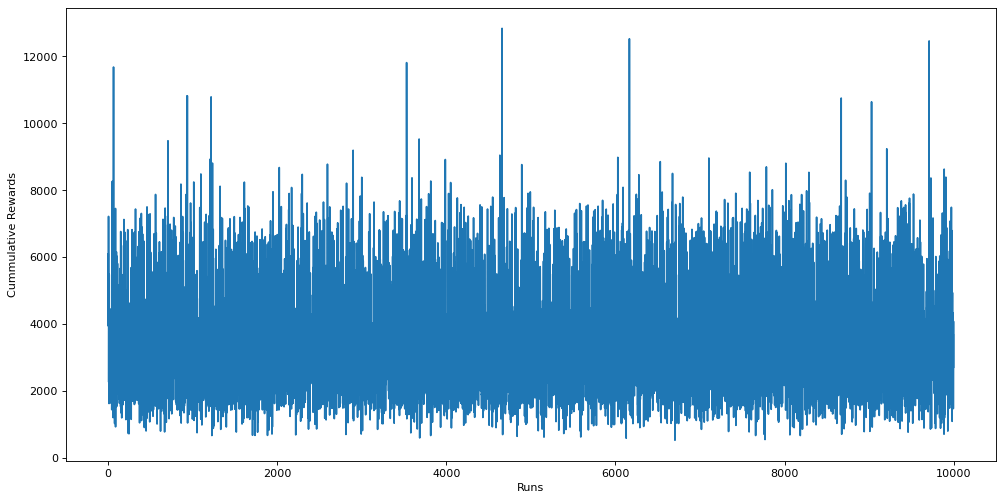

In [ ]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(15,7.5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(d)
plt.ylabel('Cummulative Rewards')
plt.xlabel('Runs')
plt.show()